# Import Dataset

In [1]:
# To show the python version
import sys
assert sys.version_info >= (3,8)
print(sys.version_info)

# to show all the output from a code chunk
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# matplotlib for plotting
from matplotlib import pyplot as plt
%matplotlib inline

# Other external libraries like pandas and numpy
import pandas as pd
import numpy as np
np.random.seed(999)

# machine learning models
import sklearn
print(sklearn.__version__)

#import others
from sklearn.metrics import confusion_matrix
from sklearn import model_selection, datasets
from sklearn.tree import DecisionTreeClassifier
import joblib
import pickle
import seaborn as sns

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

sys.version_info(major=3, minor=10, micro=11, releaselevel='final', serial=0)
1.1.1


In [2]:
from scipy.io import arff
# Load the arff file
header_info = arff.loadarff("Dataset/KDDTrain+.arff")
df = pd.DataFrame(header_info[0])
header_names = df.columns.values.tolist()
header_names.append('Difficulty')
kdd_train = pd.read_csv('Dataset/KDDTrain+.txt', delimiter = ',', header = None)

In [3]:
#Rename the headers
kdd_train.columns = header_names
#Drop the target variables
kdd_train_x = kdd_train.drop(['class', 'Difficulty'], axis = 1)

In [4]:
kdd_train_x = kdd_train_x.drop(['num_outbound_cmds'],axis =1)
y = ['class']
kdd_train_y = kdd_train[y]

#Identify categorical features
num_cols = kdd_train_x._get_numeric_data().columns
cate_cols = list(set(kdd_train_x.columns) - set(num_cols))

from sklearn.preprocessing import StandardScaler
std = StandardScaler()

#One-Hot Encoding the categorical features
cate_features = pd.get_dummies(kdd_train_x[cate_cols], prefix = cate_cols)
one_hot_data = kdd_train_x.drop(cate_cols, axis = 1)
#Standard Scaler on numeric data
std_fit = std.fit(one_hot_data)
array_ss = std_fit.transform(one_hot_data)
one_hot_data_c = pd.DataFrame(array_ss,columns=[num_cols])
one_hot_data_ss = pd.concat([one_hot_data_c, cate_features], axis = 1)
data_array_ss = np.array(one_hot_data_ss)
data_array_ss.shape    # Make sure that the Numpy array dimension is consistent with the Pandas Dataframe
# function to calculate mahalanobis distance

(125973, 121)

In [5]:
one_hot_data_c

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.734343,-0.818890,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387
125969,-0.107178,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.734343,1.159389,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387
125970,-0.110249,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0.734343,-0.773724,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387
125971,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.734343,-0.972455,-1.094207,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387


In [6]:
one_hot_data_ss

,"(duration,)","(src_bytes,)","(dst_bytes,)","(land,)","(wrong_fragment,)","(urgent,)","(hot,)","(num_failed_logins,)","(logged_in,)","(num_compromised,)",...,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,0,1
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
125969,-0.107178,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,0,1
125970,-0.110249,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
125971,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0


In [7]:
label_map = {"normal": 0,
            "neptune": 1,
            "satan": 1,
            "ipsweep": 1,
            "portsweep": 1,
            "smurf": 1,
            "nmap": 1,
            "back": 1,
            "teardrop": 1,
            "warezclient": 1,
            "pod": 1,
            "guess_passwd": 1,
            "buffer_overflow": 1,
            "warezmaster": 1,
            "land": 1,
            "imap": 1,
            "rootkit": 1,
            "loadmodule": 1,
            "ftp_write": 1,
            "multihop": 1,
            "phf": 1,
            "perl": 1, 
            "spy": 1}
kdd_train_y["class_binary"] = kdd_train_y["class"].map(label_map)

C:\Users\khxia\AppData\Local\Temp\ipykernel_27644\3533821117.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kdd_train_y["class_binary"] = kdd_train_y["class"].map(label_map)


In [8]:
one_hot_data_ss.describe()

,"(duration,)","(src_bytes,)","(dst_bytes,)","(land,)","(wrong_fragment,)","(urgent,)","(hot,)","(num_failed_logins,)","(logged_in,)","(num_compromised,)",...,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
count,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,2.549477e-17,-4.512349e-19,7.614590e-19,-4.794371e-18,4.230328e-19,4.455945e-18,-2.244894e-17,2.989431e-18,1.558171e-17,-6.549957e-18,...,0.005192,0.000079,0.004779,0.006192,0.005469,0.004898,0.005501,0.065816,0.815167,0.119018
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,0.071866,0.008909,0.068964,0.078444,0.073753,0.069813,0.073966,0.247961,0.388164,0.323810
min,-1.102492e-01,-7.762241e-03,-4.918644e-03,-1.408881e-02,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,-8.092618e-01,-1.166364e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.102492e-01,-7.762241e-03,-4.918644e-03,-1.408881e-02,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,-8.092618e-01,-1.166364e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-1.102492e-01,-7.754745e-03,-4.918644e-03,-1.408881e-02,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,-8.092618e-01,-1.166364e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,-1.102492e-01,-7.715224e-03,-4.790326e-03,-1.408881e-02,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,1.235694e+00,-1.166364e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.636428e+01,2.350675e+02,3.257486e+02,7.097831e+01,1.174348e+01,2.088191e+02,3.571955e+01,1.104972e+02,1.235694e+00,3.123689e+02,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# PCA

## HyperParameter Tunning for PCA

In [223]:
from sklearn.metrics import make_scorer, f1_score

def scorer_f(estimator, X):   #your own scorer
      return np.mean(estimator.score_samples(X))
parameters_pca = {'n_components' : np.linspace(0.1, 1, num = 22)}    

In [226]:
from sklearn.decomposition import PCA
model_pca = PCA()
idx_rand = np.random.permutation(len(kdd_train_x))
#num_sample = int(0.01*len(kdd_train_x))
num_sample = len(kdd_train_x)
one_hot_data_pca = one_hot_data_ss
one_hot_data_pca_sample = one_hot_data_pca.iloc[idx_rand[:num_sample]]
kdd_train_y_sample = kdd_train_y.iloc[idx_rand[:num_sample]]


In [227]:
f1sc = make_scorer(f1_score, average = 'micro')
randm_src = RandomizedSearchCV(estimator=model_pca, param_distributions = parameters_pca, cv = 3, scoring = f1sc, random_state = 0, return_train_score = True, n_jobs = -1)
model_src = randm_src.fit(one_hot_data_pca, kdd_train_y_sample["class_binary"])

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\decomposition\_pca.py", line 408, in fit
    self._fit(X)
  File "C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\decomposition\_pca.py", line 485, in _fit
    return self._fit_truncated(X, n_components, self._fit_svd_solver)
  File "C:\WINDOWS\s

 Results from Random Search 

 The best estimator across ALL searched params:
 PCA(n_components=0.9571428571428572)

 The best score across ALL searched params:
 nan

 The best parameters across ALL searched params:
 {'n_components': 0.9571428571428572}


In [228]:
#Keep best % of variance
model_pca = PCA(n_components=0.9571428571428572,whiten = True)
one_hot_data_pca = model_pca.fit_transform(one_hot_data_ss)

print(one_hot_data_pca.shape)

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


(125973, 25)


In [13]:
model_pca = PCA(n_components=25,whiten=True)
new_header =['Variable '+str(i) for i in range(model_pca.n_components)]

    
print(new_header)

['Variable 0', 'Variable 1', 'Variable 2', 'Variable 3', 'Variable 4', 'Variable 5', 'Variable 6', 'Variable 7', 'Variable 8', 'Variable 9', 'Variable 10', 'Variable 11', 'Variable 12', 'Variable 13', 'Variable 14', 'Variable 15', 'Variable 16', 'Variable 17', 'Variable 18', 'Variable 19', 'Variable 20', 'Variable 21', 'Variable 22', 'Variable 23', 'Variable 24']


In [14]:
one_hot_data_pca = pd.DataFrame(one_hot_data_pca,columns=new_header)

In [15]:
data_array_pca = np.array(one_hot_data_pca)

# Visualize Data

In [16]:
X_norm = (one_hot_data - one_hot_data.min())/(one_hot_data.max() - one_hot_data.min())
pca_plot = PCA(n_components=2)
transformed = pd.DataFrame(pca_plot.fit_transform(X_norm))
c_binary = kdd_train_y['class_binary']

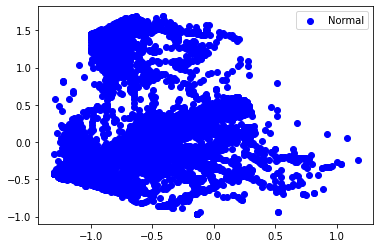

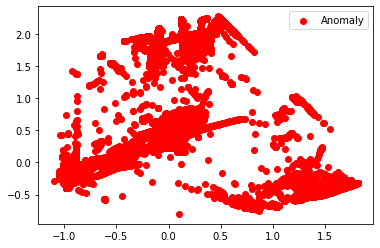

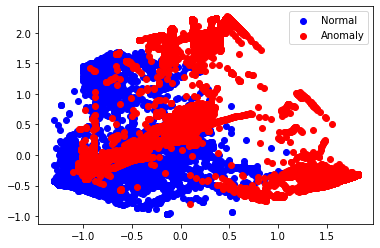

In [17]:
plt.scatter(transformed[c_binary==0][0], transformed[c_binary==0][1], label='Normal', c='blue')

plt.legend()
plt.show()

plt.scatter(transformed[c_binary==1][0], transformed[c_binary==1][1], label='Anomaly', c='red')

plt.legend()
plt.show()


plt.scatter(transformed[c_binary==0][0], transformed[c_binary==0][1], label='Normal', c='blue')
plt.scatter(transformed[c_binary==1][0], transformed[c_binary==1][1], label='Anomaly', c='red')
plt.legend()
plt.show()



In [18]:
one_hot_data_maha = one_hot_data_pca
one_hot_data_if = one_hot_data_pca
one_hot_data_svm = one_hot_data_pca

one_hot_data_maha_ss = one_hot_data_ss
one_hot_data_if_ss = one_hot_data_ss
one_hot_data_svm_ss = one_hot_data_ss

In [19]:
one_hot_data_ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Columns: 121 entries, ('duration',) to protocol_type_udp
dtypes: float64(37), uint8(84)
memory usage: 45.7 MB


In [20]:
one_hot_data_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Variable 0   125973 non-null  float64
 1   Variable 1   125973 non-null  float64
 2   Variable 2   125973 non-null  float64
 3   Variable 3   125973 non-null  float64
 4   Variable 4   125973 non-null  float64
 5   Variable 5   125973 non-null  float64
 6   Variable 6   125973 non-null  float64
 7   Variable 7   125973 non-null  float64
 8   Variable 8   125973 non-null  float64
 9   Variable 9   125973 non-null  float64
 10  Variable 10  125973 non-null  float64
 11  Variable 11  125973 non-null  float64
 12  Variable 12  125973 non-null  float64
 13  Variable 13  125973 non-null  float64
 14  Variable 14  125973 non-null  float64
 15  Variable 15  125973 non-null  float64
 16  Variable 16  125973 non-null  float64
 17  Variable 17  125973 non-null  float64
 18  Variable 18  125973 non-

# Mahalanobis

## Standard Scaler Data Before PCA 

In [21]:
#Use new PCA data for Mahalanobis Distance
import scipy as sp
mu_vec = np.mean(data_array_ss,axis = 0)
inv_cormat = sp.linalg.pinv(np.cov(data_array_ss, rowvar=False))

# For loop to get the distance for all the variables
mahal_dist = []

for i in range(data_array_ss.shape[0]):
    x_minus_mu = data_array_ss[i,:] - mu_vec
    left_term = np.dot(x_minus_mu, inv_cormat)
    mahal = np.dot(left_term, x_minus_mu.T)
    mahal = np.sqrt(mahal)
    mahal_dist.append(mahal)

np.mean(one_hot_data_maha_ss)

from scipy.stats import chi2
one_hot_data_maha_ss['p-value'] = 1 - chi2.cdf(mahal_dist, df = 25) #pdf(x, degreeOfFreedom = Number of Variables)

#Calculate number of p-value less than 0.01
print(np.count_nonzero(one_hot_data_maha_ss['p-value'] < 0.01))

C:\WINDOWS\system32\myenv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(duration,)           2.549477e-17
(src_bytes,)         -4.512349e-19
(dst_bytes,)          7.614590e-19
(land,)              -4.794371e-18
(wrong_fragment,)     4.230328e-19
                          ...     
service_vmnet         4.897875e-03
service_whois         5.501179e-03
protocol_type_icmp    6.581569e-02
protocol_type_tcp     8.151667e-01
protocol_type_udp     1.190176e-01
Length: 121, dtype: float64

363


In [22]:
pvalue_ss = one_hot_data_maha_ss['p-value']
bi_pvalue_ss = pvalue_ss

bi_pvalue_ss = np.where(pvalue_ss < 0.01, 1, bi_pvalue_ss)
bi_pvalue_ss = np.where(pvalue_ss >= 0.01, 0, bi_pvalue_ss)

from sklearn.metrics import accuracy_score

train_acc_maha_ss = accuracy_score(kdd_train_y['class_binary'], bi_pvalue_ss)
print("Training accuracy: {:.4f}".format(train_acc_maha_ss))
cm_maha_ss = confusion_matrix (kdd_train_y["class_binary"], bi_pvalue_ss)
print(cm_maha_ss)

Training accuracy: 0.5336
[[67101   242]
 [58509   121]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, 'Predicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

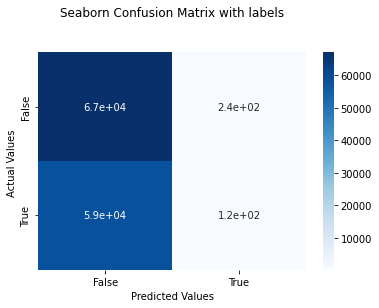

Precision =  0.3333333333333333
Recall =  0.0020637898686679174


In [23]:
ax = sns.heatmap(cm_maha_ss, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


## FP,FN,TP,TN
TN_maha = cm_maha_ss[0][0]
FN_maha = cm_maha_ss[1][0]
FP_maha = cm_maha_ss[0][1]
TP_maha = cm_maha_ss[1][1]

##Precision and Recall
Precision_maha_ss = TP_maha/(TP_maha+FP_maha)
Recall_maha_ss = TP_maha/(TP_maha+FN_maha)

print ("Precision = ",Precision_maha_ss)
print ("Recall = ",Recall_maha_ss)


In [24]:
one_hot_data_ss.drop(['p-value'], axis = 1)

,"(duration,)","(src_bytes,)","(dst_bytes,)","(land,)","(wrong_fragment,)","(urgent,)","(hot,)","(num_failed_logins,)","(logged_in,)","(num_compromised,)",...,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,0,1
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
125969,-0.107178,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,0,1
125970,-0.110249,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
125971,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0


## After PCA

In [25]:
#Use new PCA data for Mahalanobis Distance
import scipy as sp
mu_vec = np.mean(data_array_pca,axis = 0)
inv_cormat = sp.linalg.pinv(np.cov(data_array_pca, rowvar=False))

# For loop to get the distance for all the variables
mahal_dist = []

for i in range(data_array_pca.shape[0]):
    x_minus_mu = data_array_pca[i,:] - mu_vec
    left_term = np.dot(x_minus_mu, inv_cormat)
    mahal = np.dot(left_term, x_minus_mu.T)
    mahal = np.sqrt(mahal)
    mahal_dist.append(mahal)

np.mean(one_hot_data_maha)

from scipy.stats import chi2
one_hot_data_maha['p-value'] = 1 - chi2.cdf(mahal_dist, df = 24) #pdf(x, degreeOfFreedom = Number of Variables)

#Calculate number of p-value less than 0.01
print(np.count_nonzero(one_hot_data_maha['p-value'] < 0.01))

C:\WINDOWS\system32\myenv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Variable 0    -3.074038e-16
Variable 1    -3.445179e-16
Variable 2    -4.840623e-16
Variable 3     1.869241e-16
Variable 4     4.478507e-17
Variable 5    -1.452835e-16
Variable 6    -5.431741e-17
Variable 7    -2.869008e-16
Variable 8    -1.137112e-16
Variable 9    -4.512349e-17
Variable 10   -3.855239e-17
Variable 11   -1.556761e-17
Variable 12   -3.384262e-19
Variable 13    2.368983e-18
Variable 14    9.983573e-18
Variable 15    4.963584e-18
Variable 16   -2.256175e-17
Variable 17    2.707410e-18
Variable 18    8.201195e-17
Variable 19    5.723633e-17
Variable 20   -3.771478e-16
Variable 21    3.550091e-16
Variable 22   -2.738996e-16
Variable 23   -2.442309e-16
Variable 24   -1.949899e-16
dtype: float64

160


In [26]:
pvalue = one_hot_data_maha['p-value']
bi_pvalue = pvalue

bi_pvalue = np.where(pvalue < 0.01, 1, bi_pvalue)
bi_pvalue = np.where(pvalue >= 0.01, 0, bi_pvalue)

from sklearn.metrics import accuracy_score

train_acc_maha = accuracy_score(kdd_train_y['class_binary'], bi_pvalue)
print("Training accuracy: {:.4f}".format(train_acc_maha))
cm_maha = confusion_matrix (kdd_train_y["class_binary"], bi_pvalue)
print(cm_maha)

Training accuracy: 0.5339
[[67223   120]
 [58590    40]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, 'Predicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

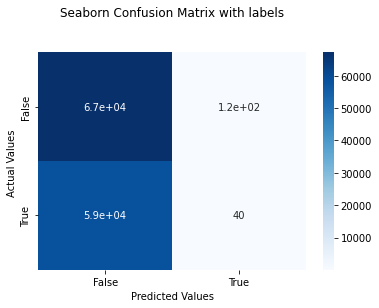

Precision =  0.25
Recall =  0.0006822445846836091


In [27]:
ax = sns.heatmap(cm_maha, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


## FP,FN,TP,TN
TN_maha = cm_maha[0][0]
FN_maha = cm_maha[1][0]
FP_maha = cm_maha[0][1]
TP_maha = cm_maha[1][1]

##Precision and Recall
Precision_maha = TP_maha/(TP_maha+FP_maha)
Recall_maha = TP_maha/(TP_maha+FN_maha)

print ("Precision = ",Precision_maha)
print ("Recall = ",Recall_maha)

In [28]:
one_hot_data_pca = one_hot_data_pca.drop(['p-value'], axis =1)

# Minimum Covariance Determinant (MCD)

## Before PCA

In [29]:
from sklearn.covariance import MinCovDet
from sklearn.datasets import make_gaussian_quantiles

rng = np.random.RandomState(42)

In [30]:
one_hot_data_ss = one_hot_data_ss.drop(['p-value'],axis = 1)

In [31]:
mcd_model_ss = MinCovDet(random_state=42).fit(one_hot_data_ss)

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\covariance\_robust_covariance.py:738: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


In [32]:
pickle.dump(mcd_model_ss,open('model_mcd_ss.sav','wb'))

In [36]:
mcd_model_ss.raw_location_.shape

(121,)

In [39]:
np.mean(data_array_ss,axis = 0)
sp.linalg.pinv(np.cov(data_array_ss, rowvar=False))
inv_cormat = sp.linalg.pinv(mcd_model_ss.covariance_)
mu_vect = mcd_model_ss.location_
mahal_dist = []
for i in range(data_array_ss.shape[0]):
    x_minus_mu = data_array_ss[i,:] - mu_vect
    left_term = np.dot(x_minus_mu, inv_cormat)
    mahal = np.dot(left_term, x_minus_mu.T)
    mahal = np.sqrt(mahal)
    mahal_dist.append(mahal)
    
np.mean(one_hot_data_maha_ss)

from scipy.stats import chi2
one_hot_data_maha_ss['p-value_mcd'] = 1 - chi2.cdf(mahal_dist, df = 121) #pdf(x, degreeOfFreedom = Number of Variables)

#Calculate number of p-value less than 0.01
print(np.count_nonzero(one_hot_data_maha_ss['p-value_mcd'] < 0.01))

array([ 2.54947740e-17, -4.51234938e-19,  7.61458958e-19, -4.79437122e-18,
        4.23032754e-19,  4.45594501e-18, -2.24489382e-17,  2.98943147e-18,
        1.55817065e-17, -6.54995715e-18,  1.75417582e-17, -3.66628387e-19,
        3.58167732e-18, -4.65336030e-18,  3.97650789e-18, -5.30201052e-18,
       -7.33256774e-19,  8.31964417e-18, -3.94830571e-17,  4.16264230e-17,
        4.48414720e-18, -1.23243542e-16,  3.82985654e-17, -1.84724303e-17,
       -1.61880534e-16, -1.71469276e-17, -2.72997138e-17, -1.75699604e-17,
       -5.81529027e-17, -1.21551411e-16, -2.37462386e-17,  2.89918448e-17,
        3.06839758e-17,  1.71187255e-17, -2.63126373e-17,  4.90717995e-17,
        7.74996006e-17,  3.65157613e-04,  8.91699015e-02,  1.23994824e-02,
        8.17635525e-04,  1.92184039e-02,  2.76654521e-01,  2.89744628e-03,
        1.00815254e-03,  3.88972240e-04,  5.94929072e-01,  2.15125463e-03,
        1.48444508e-03,  5.79489256e-04,  6.84273614e-03,  1.58764180e-05,
        7.58098958e-03,  

array([[ 1.56177027e+00, -1.00906473e-01, -2.58064545e-02, ...,
         2.13955467e-01, -1.11981909e-01, -1.01973558e-01],
       [-1.00906473e-01,  1.04742432e+00,  1.30112677e-03, ...,
        -2.74288338e-02,  8.52409880e-02, -5.78121541e-02],
       [-2.58064545e-02,  1.30112677e-03,  1.00165155e+00, ...,
        -7.63146805e-03, -3.31085977e-02,  4.07400658e-02],
       ...,
       [ 2.13955467e-01, -2.74288338e-02, -7.63146805e-03, ...,
         4.80410835e+02, -2.43712460e+02, -2.36698376e+02],
       [-1.11981909e-01,  8.52409880e-02, -3.31085977e-02, ...,
        -2.43712460e+02,  1.52508272e+02,  9.12041879e+01],
       [-1.01973558e-01, -5.78121541e-02,  4.07400658e-02, ...,
        -2.36698376e+02,  9.12041879e+01,  1.45494188e+02]])

C:\WINDOWS\system32\myenv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(duration,)           2.549477e-17
(src_bytes,)         -4.512349e-19
(dst_bytes,)          7.614590e-19
(land,)              -4.794371e-18
(wrong_fragment,)     4.230328e-19
                          ...     
service_whois         5.501179e-03
protocol_type_icmp    6.581569e-02
protocol_type_tcp     8.151667e-01
protocol_type_udp     1.190176e-01
p-value               9.649991e-01
Length: 122, dtype: float64

27801


In [40]:
pvalue_mcd_ss = one_hot_data_maha_ss['p-value_mcd']
bi_pvalue_mcd_ss = pvalue_mcd_ss

bi_pvalue_mcd_ss = np.where(pvalue_mcd_ss < 0.01, 1, bi_pvalue_mcd_ss)
bi_pvalue_mcd_ss = np.where(pvalue_mcd_ss >= 0.01, 0, bi_pvalue_mcd_ss)


In [41]:
from sklearn.metrics import accuracy_score

train_acc_maha_mcd_ss = accuracy_score(kdd_train_y['class_binary'], bi_pvalue_mcd_ss)
print("Training accuracy: {:.4f}".format(train_acc_maha_mcd_ss))
cm_maha_mcd_ss = confusion_matrix (kdd_train_y["class_binary"], bi_pvalue_mcd_ss)
print(cm_maha_mcd_ss)

Training accuracy: 0.5353
[[53490 13853]
 [44682 13948]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

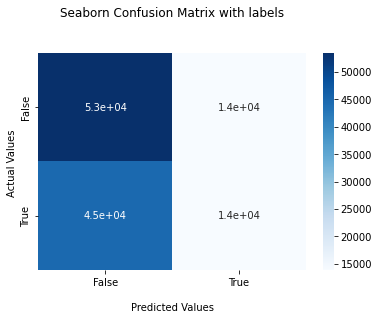

0.5017085716341139
0.2378986866791745


In [42]:
ax = sns.heatmap(cm_maha_mcd_ss, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## FP,FN,TP,TN
TN_maha_mcd = cm_maha_mcd_ss[0][0]
FN_maha_mcd = cm_maha_mcd_ss[1][0]
FP_maha_mcd = cm_maha_mcd_ss[0][1]
TP_maha_mcd = cm_maha_mcd_ss[1][1]

##Precision and Recall
Precision_maha_mcd_ss = TP_maha_mcd/(TP_maha_mcd+FP_maha_mcd)
Recall_maha_mcd_ss = TP_maha_mcd/(TP_maha_mcd+FN_maha_mcd)

print (Precision_maha_mcd_ss)
print (Recall_maha_mcd_ss)

## MCD with PCA

In [43]:
mcd_model = MinCovDet(random_state=42).fit(one_hot_data_pca)

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-321.056592595840527 > -321.181105834377433). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(


In [44]:
pickle.dump(mcd_model,open('model_mcd.sav','wb'))

In [45]:
np.mean(data_array_pca,axis = 0)
sp.linalg.pinv(np.cov(data_array_pca, rowvar=False))
inv_cormat = sp.linalg.pinv(mcd_model.covariance_)
mu_vect = mcd_model.location_
mahal_dist = []
for i in range(data_array_pca.shape[0]):
    x_minus_mu = data_array_pca[i,:] - mu_vect
    left_term = np.dot(x_minus_mu, inv_cormat)
    mahal = np.dot(left_term, x_minus_mu.T)
    mahal = np.sqrt(mahal)
    mahal_dist.append(mahal)
    
np.mean(one_hot_data_maha)

from scipy.stats import chi2
one_hot_data_maha['p-value_mcd'] = 1 - chi2.cdf(mahal_dist, df = 24) #pdf(x, degreeOfFreedom = Number of Variables)

#Calculate number of p-value less than 0.01
print(np.count_nonzero(one_hot_data_maha['p-value_mcd'] < 0.01))

array([-3.07403802e-16, -3.44517875e-16, -4.84062280e-16,  1.86924073e-16,
        4.47850676e-17, -1.45283549e-16, -5.43174057e-17, -2.86900814e-16,
       -1.13711204e-16, -4.51234938e-17, -3.85523850e-17, -1.55676054e-17,
       -3.38426204e-19,  2.36898343e-18,  9.98357301e-18,  4.96358432e-18,
       -2.25617469e-17,  2.70740963e-18,  8.20119500e-17,  5.72363317e-17,
       -3.77147802e-16,  3.55009088e-16, -2.73899607e-16, -2.44230910e-16,
       -1.94989898e-16])

array([[ 1.00000000e+00,  1.58169621e-14, -3.00337208e-15,
        -2.53653165e-14, -5.59521179e-15,  2.53731511e-14,
         1.49540164e-14, -1.14609392e-14,  7.34622076e-17,
         1.79589969e-15, -7.29236887e-15, -1.61401953e-15,
         7.94521945e-16, -5.56555125e-16, -4.06043891e-15,
         2.16095612e-15,  4.42754436e-16,  3.46338013e-16,
         1.28237452e-15,  2.18473756e-15,  1.61025028e-14,
         1.45675528e-14, -9.67086896e-15,  1.26300184e-14,
        -1.91791028e-14],
       [ 1.20423962e-14,  1.00000000e+00, -2.16893590e-14,
         9.12306714e-16,  1.80530961e-14, -3.71725543e-15,
         5.56098134e-14, -2.88336108e-14, -8.44969097e-14,
        -6.44350655e-17, -5.10742581e-15,  4.89957962e-15,
        -2.12716354e-15,  5.59327464e-16, -4.03911057e-15,
         1.31304860e-14,  4.73552688e-14, -7.54837854e-15,
        -2.39289103e-14,  1.16191655e-14,  4.21437467e-14,
        -1.51110276e-14,  5.08162305e-15,  2.44672145e-14,
        -5.93969318e-15],
    

C:\WINDOWS\system32\myenv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Variable 0    -3.074038e-16
Variable 1    -3.445179e-16
Variable 2    -4.840623e-16
Variable 3     1.869241e-16
Variable 4     4.478507e-17
Variable 5    -1.452835e-16
Variable 6    -5.431741e-17
Variable 7    -2.869008e-16
Variable 8    -1.137112e-16
Variable 9    -4.512349e-17
Variable 10   -3.855239e-17
Variable 11   -1.556761e-17
Variable 12   -3.384262e-19
Variable 13    2.368983e-18
Variable 14    9.983573e-18
Variable 15    4.963584e-18
Variable 16   -2.256175e-17
Variable 17    2.707410e-18
Variable 18    8.201195e-17
Variable 19    5.723633e-17
Variable 20   -3.771478e-16
Variable 21    3.550091e-16
Variable 22   -2.738996e-16
Variable 23   -2.442309e-16
Variable 24   -1.949899e-16
p-value        9.966979e-01
dtype: float64

60281


In [46]:
pvalue_mcd = one_hot_data_maha['p-value_mcd']
bi_pvalue_mcd = pvalue_mcd

bi_pvalue_mcd = np.where(pvalue_mcd < 0.01, 1, bi_pvalue_mcd)
bi_pvalue_mcd = np.where(pvalue_mcd >= 0.01, 0, bi_pvalue_mcd)

In [47]:
from sklearn.metrics import accuracy_score

train_acc_maha_mcd = accuracy_score(kdd_train_y['class_binary'], bi_pvalue_mcd)
print("Training accuracy: {:.4f}".format(train_acc_maha_mcd))
cm_maha_mcd = confusion_matrix (kdd_train_y["class_binary"], bi_pvalue_mcd)
print(cm_maha_mcd)

Training accuracy: 0.4860
[[34145 33198]
 [31547 27083]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

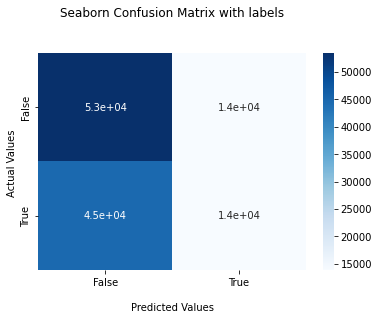

0.44927920903767354
0.4619307521746546


In [48]:
ax = sns.heatmap(cm_maha_mcd_ss, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## FP,FN,TP,TN
TN_maha_mcd = cm_maha_mcd[0][0]
FN_maha_mcd = cm_maha_mcd[1][0]
FP_maha_mcd = cm_maha_mcd[0][1]
TP_maha_mcd = cm_maha_mcd[1][1]

##Precision and Recall
Precision_maha_mcd = TP_maha_mcd/(TP_maha_mcd+FP_maha_mcd)
Recall_maha_mcd = TP_maha_mcd/(TP_maha_mcd+FN_maha_mcd)

print (Precision_maha_mcd)
print (Recall_maha_mcd)

# Isolation Forest
## Before PCA

In [49]:
from sklearn.ensemble import IsolationForest
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
model_if_ss = IsolationForest(random_state = 99)
parameters = {'n_estimators' : sp_randInt(100, 1000),
            'contamination' : sp_randFloat(0, 1)
             }
parameters = {'n_estimators' : [1000,2000,3000,4000,5000,6000],
            'contamination' : np.linspace(0, 0.2, num = 10)
             # 'bootstrap': [True, False]
             }
np.linspace(0, 0.3, num = 10)




array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
       0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ])

In [50]:
one_hot_data_if_ss = one_hot_data_if_ss.drop(['p-value','p-value_mcd'],axis = 1)

In [51]:
def scorer_f(estimator, X):   #Scorer function for isolation forest
       return np.mean(estimator.score_samples(one_hot_data_if_ss))
from sklearn.metrics import make_scorer, f1_score
#Set normal to 0 and abnormal to 1 (binary)


In [52]:
# randomly sample
idx_rand = np.random.permutation(len(one_hot_data_if_ss))
num_sample = int(0.01*len(one_hot_data_if_ss))
one_hot_data_if_sample = one_hot_data_if_ss.iloc[idx_rand[:num_sample]]
kdd_train_y_sample = kdd_train_y.iloc[idx_rand[:num_sample]]

In [53]:
one_hot_data_if_ss = pd.DataFrame(one_hot_data_if_ss)

In [54]:
one_hot_data_if_ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Columns: 121 entries, ('duration',) to protocol_type_udp
dtypes: float64(37), uint8(84)
memory usage: 45.7 MB


In [55]:
f1sc = make_scorer(f1_score, average = 'micro')
randm_src = RandomizedSearchCV(estimator=model_if_ss, param_distributions = parameters, cv = 3, scoring = f1sc, random_state = 0, return_train_score = True, n_jobs = -1)
model = randm_src.fit(one_hot_data_if_sample, kdd_train_y_sample["class_binary"])


C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\ensemble\_iforest.py", line 271, in fit
    raise ValueError(
ValueError: contamination must be in (0, 0.5], got: 0.000000

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\model_selectio

In [56]:
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 IsolationForest(contamination=0.022222222222222223, n_estimators=6000,
                random_state=99)

 The best score across ALL searched params:
 0.452701064514907

 The best parameters across ALL searched params:
 {'n_estimators': 6000, 'contamination': 0.022222222222222223}


In [57]:
model_if_ss = IsolationForest(n_estimators=6000,contamination = 0.022222222222222223, max_features = 1.0)
model_if_ss = model_if_ss.fit(one_hot_data_if_ss)

pickle.dump(model_if_ss,open('model_if_ss.sav','wb'))

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [58]:
y_pred_if_ss = model_if_ss.predict(one_hot_data_if_ss)

pickle.dump(y_pred_if_ss,open('y_pred_if_ss.sav','wb'))

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [59]:

##y_pred_if_ss = joblib.load('y_pred_if_ss.sav')


In [60]:
y_pred_if_ss = np.where(y_pred_if_ss == -1, 0, y_pred_if_ss)
from sklearn.metrics import accuracy_score
train_acc_if_ss = accuracy_score(kdd_train_y['class_binary'], y_pred_if_ss)
print("Training accuracy: {:.4f}".format(train_acc_if_ss))

Training accuracy: 0.4486


[[  341 67002]
 [ 2459 56171]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

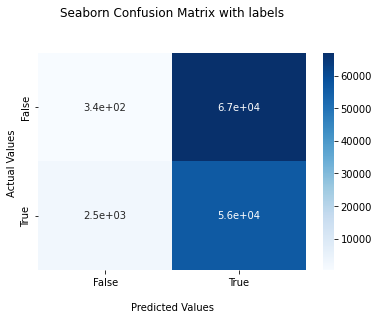

0.4560333839396621
0.9580590141565751


In [61]:
cm_if_ss = confusion_matrix (kdd_train_y["class_binary"], y_pred_if_ss)
print(cm_if_ss)
ax = sns.heatmap(cm_if_ss, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## FP,FN,TP,TN
TN_if = cm_if_ss[0][0]
FN_if = cm_if_ss[1][0]
FP_if = cm_if_ss[0][1]
TP_if = cm_if_ss[1][1]

##Precision and Recall
Precision_if_ss = TP_if/(TP_if+FP_if)
Recall_if_ss = TP_if/(TP_if+FN_if)

print (Precision_if_ss)
print (Recall_if_ss)

# With PCA

In [66]:
one_hot_data_if = one_hot_data_if.drop(['p-value','p-value_mcd'],axis = 1)

In [69]:
model_if = IsolationForest(n_estimators=6000,contamination = 0.022222222222222223, max_features = 1.0)
model_if = model_if.fit(one_hot_data_if)
pickle.dump(model_if,open('model_if.sav','wb'))

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [71]:
y_pred_if = model_if.predict(one_hot_data_if)
##y_pred_if = joblib.load('y_pred_if.sav')

In [72]:
y_pred_if = np.where(y_pred_if == -1, 0, y_pred_if)
from sklearn.metrics import accuracy_score
train_acc_if = accuracy_score(kdd_train_y['class_binary'], y_pred_if)
print("Training accuracy: {:.4f}".format(train_acc_if))

Training accuracy: 0.4576


[[  910 66433]
 [ 1890 56740]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

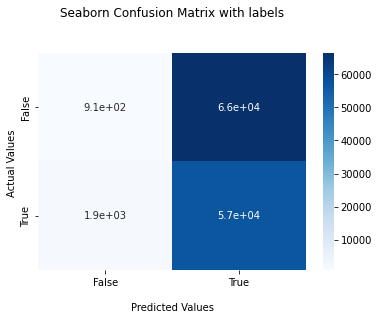

0.4606529028277301
0.9677639433736994


In [73]:
cm_if = confusion_matrix (kdd_train_y["class_binary"], y_pred_if)
print(cm_if)
ax = sns.heatmap(cm_if, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## FP,FN,TP,TN
TN_if = cm_if[0][0]
FN_if = cm_if[1][0]
FP_if = cm_if[0][1]
TP_if = cm_if[1][1]

##Precision and Recall
Precision_if = TP_if/(TP_if+FP_if)
Recall_if = TP_if/(TP_if+FN_if)

print (Precision_if)
print (Recall_if)

# OCSVM
## Without PCA

In [74]:
one_hot_data_svm_ss =one_hot_data_svm_ss = one_hot_data_svm_ss.drop(['p-value','p-value_mcd'],axis = 1)

In [75]:

#10% of data, 12597 out of 125973 is used for training.
one_hot_data_svm_ten_percent_ss = one_hot_data_svm_ss[0:12597]
kdd_train_y_ten_percent = kdd_train_y[0:12597]

from scipy.stats import uniform as sp_randFloat
    #Hyperparameter Tuning
from sklearn.svm import OneClassSVM
parameters_svm = {
             "nu" : sp_randFloat()
             }
model_svm_ss = OneClassSVM()

In [76]:
model_svm_ss = OneClassSVM(kernel = 'linear', nu=0.5488135039273248)

model_svm_ss = model_svm_ss.fit(one_hot_data_svm_ten_percent_ss)


C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [77]:
pickle.dump(model_svm_ss,open('model_svm_ss.sav','wb'))

In [78]:

y_pred_svm_ss =model_svm_ss.predict(one_hot_data_svm_ss)

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [79]:
y_pred_svm_ss

array([ 1,  1,  1, ...,  1, -1, -1], dtype=int64)

In [80]:
y_pred_svm_ss = np.where(y_pred_svm_ss == -1, 0, y_pred_svm_ss)

train_acc_ss = accuracy_score(kdd_train_y['class_binary'], y_pred_svm_ss)
print("Training accuracy: {:.4f}".format(train_acc_ss))
cm_svm_ss = confusion_matrix (kdd_train_y["class_binary"], y_pred_svm_ss)
print(cm_svm_ss)

Training accuracy: 0.4868
[[36267 31076]
 [33575 25055]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

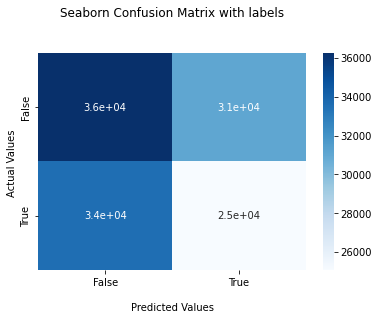

Precision:  0.4463665354260569
Recall 0.42734095173119563


In [81]:
ax = sns.heatmap(cm_svm_ss, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


## FP,FN,TP,TN
TN_svm = cm_svm_ss[0][0]
FN_svm = cm_svm_ss[1][0]
FP_svm = cm_svm_ss[0][1]
TP_svm = cm_svm_ss[1][1]


##Precision and Recall
Precision_svm_ss = TP_svm/(TP_svm+FP_svm)
Recall_svm_ss = TP_svm/(TP_svm+FN_svm)

print ("Precision: ",Precision_svm_ss)
print ("Recall",Recall_svm_ss)

In [82]:
one_hot_data_svm = one_hot_data_svm.drop(['p-value','p-value_mcd'],axis = 1)

In [83]:
one_hot_data_svm_ten_percent = one_hot_data_svm[0:12597]


In [84]:
model_svm = OneClassSVM(kernel = 'linear', nu=0.5488135039273248)
model_svm = model_svm.fit(one_hot_data_svm_ten_percent)


In [85]:
pickle.dump(model_svm,open('model_svm_pca.sav','wb'))

In [86]:
y_pred_svm = model_svm.predict(one_hot_data_svm)

In [87]:
#Evaluation on training result
y_pred_svm = np.where(y_pred_svm == -1, 0, y_pred_svm)

train_acc = accuracy_score(kdd_train_y['class_binary'], y_pred_svm)
print("Training accuracy: {:.4f}".format(train_acc))
cm_svm = confusion_matrix (kdd_train_y["class_binary"], y_pred_svm)
print(cm_svm)

Training accuracy: 0.5114
[[37667 29676]
 [31869 26761]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

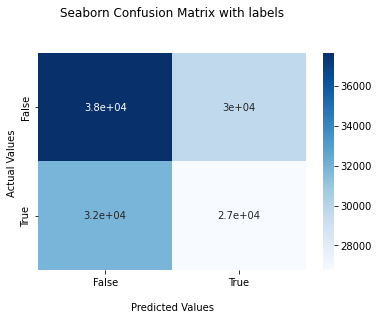

Precision:  0.47417474351932243
Recall 0.45643868326795156


In [88]:
ax = sns.heatmap(cm_svm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


## FP,FN,TP,TN
TN_svm = cm_svm[0][0]
FN_svm = cm_svm[1][0]
FP_svm = cm_svm[0][1]
TP_svm = cm_svm[1][1]


##Precision and Recall
Precision_svm = TP_svm/(TP_svm+FP_svm)
Recall_svm = TP_svm/(TP_svm+FN_svm)

print ("Precision: ",Precision_svm)
print ("Recall",Recall_svm)

# K-Means Clustering

In [89]:
one_hot_data_kmean_ss = one_hot_data_ss

In [90]:
one_hot_data_kmean = one_hot_data_pca

In [91]:
from sklearn.cluster import KMeans

In [92]:
kmean_ss = KMeans(n_clusters=2)
kmean = KMeans(n_clusters=2)


In [93]:
kmean_ss = kmean_ss.fit(one_hot_data_kmean_ss)
kmean_result_ss = kmean_ss.labels_

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [94]:
pickle.dump(kmean_ss,open('model_kmean_ss','wb'))

In [95]:
kmean_result_ss_c = kmean_result_ss

In [96]:
count_1 = np.count_nonzero(kmean_result_ss==1)

In [97]:
count_0 = kmean_result_ss.shape[0] - np.count_nonzero(kmean_result_ss==1)

In [98]:
print(count_0)
print(count_1)

91038
34935


In [99]:
if(count_1 > count_0):
    kmean_result_ss = np.where(kmean_result_ss_c ==1, 0, kmean_result_ss)
    kmean_result_ss = np.where(kmean_result_ss_c ==0, 1, kmean_result_ss)

In [100]:
kmean_result_ss

array([0, 0, 1, ..., 0, 1, 0])

In [101]:
train_acc_kmean_ss = accuracy_score(kdd_train_y['class_binary'], kmean_result_ss)
print("Training accuracy: {:.4f}".format(train_acc_kmean_ss))
cm_kmean_ss = confusion_matrix (kdd_train_y["class_binary"], kmean_result_ss)
print(cm_kmean_ss)

Training accuracy: 0.8104
[[67248    95]
 [23790 34840]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

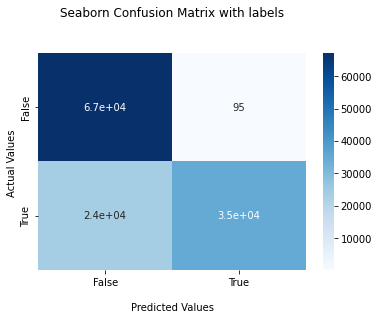

Precision:  0.9972806640904537
Recall 0.5942350332594235


In [102]:
ax = sns.heatmap(cm_kmean_ss, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


## FP,FN,TP,TN
TN_kmean = cm_kmean_ss[0][0]
FN_kmean = cm_kmean_ss[1][0]
FP_kmean = cm_kmean_ss[0][1]
TP_kmean = cm_kmean_ss[1][1]


##Precision and Recall
Precision_kmean_ss = TP_kmean/(TP_kmean+FP_kmean)
Recall_kmean_ss = TP_kmean/(TP_kmean+FN_kmean)

print ("Precision: ",Precision_kmean_ss)
print ("Recall",Recall_kmean_ss)

## K-Means (PCA)

In [103]:
kmean.fit(one_hot_data_kmean)
kmean_result = kmean.labels_

KMeans(n_clusters=2)

In [104]:
kmean_result_c = kmean_result
count_1 = np.count_nonzero(kmean_result==1)
count_0 = kmean_result_ss.shape[0] - np.count_nonzero(kmean_result_ss==0)

In [105]:
if(count_1 > count_0):
    kmean_result = np.where(kmean_result_c ==1, 0, kmean_result)
    kmean_result = np.where(kmean_results_c ==0, 1, kmean_result)

In [106]:
kmean_result

array([0, 0, 0, ..., 0, 0, 0])

In [107]:
train_acc_kmean = accuracy_score(kdd_train_y['class_binary'], kmean_result)
print("Training accuracy: {:.4f}".format(train_acc_kmean))
cm_kmean = confusion_matrix (kdd_train_y["class_binary"], kmean_result)
print(cm_kmean)

Training accuracy: 0.5150
[[61143  6200]
 [54891  3739]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

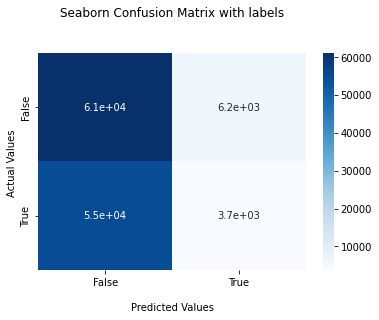

Precision:  0.37619478820806923
Recall 0.06377281255330036


In [108]:
    ax = sns.heatmap(cm_kmean, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()


    ## FP,FN,TP,TN
    TN_kmean = cm_kmean[0][0]
    FN_kmean = cm_kmean[1][0]
    FP_kmean = cm_kmean[0][1]
    TP_kmean = cm_kmean[1][1]


    ##Precision and Recall
    Precision_kmean = TP_kmean/(TP_kmean+FP_kmean)
    Recall_kmean = TP_kmean/(TP_kmean+FN_kmean)

    print ("Precision: ",Precision_kmean)
    print ("Recall",Recall_kmean)

# Comparison of Train Result

# Before PCA

In [109]:
header_cmp = ['Algorithm','accuracy', 'recall', 'precision']
table_cmp = [['Mahalanobis', train_acc_maha_ss, Recall_maha_ss, Precision_maha_ss],
             ['Maha + MCD', train_acc_maha_mcd_ss, Recall_maha_mcd_ss, Precision_maha_mcd_ss],
             ['IF', train_acc_if_ss, Recall_if_ss, Precision_if_ss],
             ['OCSVM', train_acc_ss, Recall_svm_ss, Precision_svm_ss],
             ['Kmean', train_acc_kmean_ss, Recall_kmean_ss, Precision_kmean_ss]]
comparison_ss = pd.DataFrame(table_cmp,columns=header_cmp)
comparison_ss

,Algorithm,accuracy,recall,precision
0,Mahalanobis,0.533622,0.002064,0.333333
1,Maha + MCD,0.535337,0.237899,0.501709
2,IF,0.448604,0.958059,0.456033
3,OCSVM,0.486787,0.427341,0.446367
4,Kmean,0.810396,0.594235,0.997281


# After PCA 

In [110]:
header_cmp = ['Algorithm','accuracy', 'recall', 'precision']
table_cmp = [['Mahalanobis', train_acc_maha, Recall_maha, Precision_maha],
             ['Maha + MCD', train_acc_maha_mcd, Recall_maha_mcd, Precision_maha_mcd],
             ['IF', train_acc_if, Recall_if, Precision_if],
             ['OCSVM', train_acc, Recall_svm, Precision_svm],
             ['Kmean', train_acc_kmean, Recall_kmean, Precision_kmean]]
comparison = pd.DataFrame(table_cmp,columns=header_cmp)
comparison

,Algorithm,accuracy,recall,precision
0,Mahalanobis,0.533948,0.000682,0.250000
1,Maha + MCD,0.486041,0.461931,0.449279
2,IF,0.457638,0.967764,0.460653
3,OCSVM,0.511443,0.456439,0.474175
4,Kmean,0.515047,0.063773,0.376195


# Testing

In [111]:
kdd_test = pd.read_csv('Dataset/KDDTest+.txt', delimiter = ',', header = None)
kdd_test.columns = header_names
kdd_test_x = kdd_test.drop(['class','Difficulty'],axis = 1)

In [112]:
kdd_test_x = kdd_test_x.drop(['num_outbound_cmds'],axis =1)

In [113]:
num_cols = kdd_test_x._get_numeric_data().columns
cate_cols = list(set(kdd_test_x.columns) - set(num_cols))
cate_features = pd.get_dummies(kdd_test_x[cate_cols], prefix = cate_cols)
ss_test_x = kdd_test_x.drop(cate_cols, axis = 1)

In [114]:
kdd_test_x.columns
ss_test_x

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,0,0,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0,0,0,0,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,2,12983,0,0,0,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,0,20,0,0,0,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,1,0,15,0,0,0,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,794,333,0,0,0,0,0,1,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22540,0,317,938,0,0,0,0,0,1,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22541,0,54540,8314,0,0,0,2,0,1,1,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22542,0,42,42,0,0,0,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


In [115]:
std_fit_test = std.fit(ss_test_x)
test_ss = std_fit.transform(ss_test_x)

In [116]:
kdd_test_x = pd.DataFrame(ss_test_x)
columns = kdd_test_x.columns

In [117]:
kdd_test_x_ss = pd.DataFrame(test_ss)

In [118]:
kdd_test_x_ss.columns = columns

In [119]:
kdd_test_x_ss

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0.650093,-1.169697,-1.305370,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116
1,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0.650093,-1.250212,-1.397181,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116
2,-0.154113,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,-0.636681,-0.489800,0.002934,-0.228985,1.559906,0.004234,-0.358118,-0.35275,-0.602719,-0.565483
3,-0.155534,-0.021946,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,-2.029801,-0.749234,0.898090,-0.410217,2.833328,3.049016,-0.358118,-0.35275,-0.602719,-0.565483
4,-0.154823,-0.021988,-0.096189,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,-1.753304,-0.489800,-0.685647,0.360018,-0.333901,0.004234,-0.358118,-0.35275,1.540764,1.205682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.155534,-0.020309,-0.081202,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,...,-0.998254,0.002232,0.255414,-0.138370,-0.399204,-0.112873,-0.321505,-0.35275,-0.602719,-0.565483
22540,-0.155534,-0.021318,-0.052690,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,...,0.033292,1.022079,0.898090,-0.410217,-0.399204,-0.112873,-0.321505,-0.35275,-0.602719,-0.565483
22541,-0.155534,0.093373,0.294926,-0.017624,-0.059104,-0.019459,2.040705,-0.143999,1.123125,0.121069,...,0.650093,1.022079,0.898090,-0.410217,-0.431856,-0.229980,-0.358118,-0.35275,-0.421943,-0.390861
22542,-0.155534,-0.021899,-0.094917,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0.650093,0.995240,0.875137,-0.364909,-0.431856,-0.229980,-0.358118,-0.35275,-0.602719,-0.565483


In [120]:
pdCat = pd.DataFrame(cate_cols)

In [121]:
cate_pd = kdd_test[['flag','service','protocol_type']]

In [122]:
cate_pd.columns

Index(['flag', 'service', 'protocol_type'], dtype='object')

In [123]:
kdd_test_x_t = pd.concat([kdd_test_x_ss,cate_pd],axis = 1)

In [124]:
kdd_test_x_t

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,flag,service,protocol_type
0,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,REJ,private,tcp
1,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,REJ,private,tcp
2,-0.154113,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,-0.228985,1.559906,0.004234,-0.358118,-0.35275,-0.602719,-0.565483,SF,ftp_data,tcp
3,-0.155534,-0.021946,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,-0.410217,2.833328,3.049016,-0.358118,-0.35275,-0.602719,-0.565483,SF,eco_i,icmp
4,-0.154823,-0.021988,-0.096189,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0.360018,-0.333901,0.004234,-0.358118,-0.35275,1.540764,1.205682,RSTO,telnet,tcp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.155534,-0.020309,-0.081202,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,...,-0.138370,-0.399204,-0.112873,-0.321505,-0.35275,-0.602719,-0.565483,SF,smtp,tcp
22540,-0.155534,-0.021318,-0.052690,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,...,-0.410217,-0.399204,-0.112873,-0.321505,-0.35275,-0.602719,-0.565483,SF,http,tcp
22541,-0.155534,0.093373,0.294926,-0.017624,-0.059104,-0.019459,2.040705,-0.143999,1.123125,0.121069,...,-0.410217,-0.431856,-0.229980,-0.358118,-0.35275,-0.421943,-0.390861,SF,http,tcp
22542,-0.155534,-0.021899,-0.094917,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,-0.364909,-0.431856,-0.229980,-0.358118,-0.35275,-0.602719,-0.565483,SF,domain_u,udp


In [125]:
kdd_test_y = kdd_test['class']

In [126]:
combine_data = pd.concat([kdd_train_x, kdd_test_x_t])
combine_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.000000,tcp,ftp_data,SF,491.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,150.000000,25.000000,0.170000,0.030000,0.170000,0.000000,0.000000,0.00000,0.050000,0.000000
1,0.000000,udp,other,SF,146.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.000000,0.600000,0.880000,0.000000,0.000000,0.00000,0.000000,0.000000
2,0.000000,tcp,private,S0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,26.000000,0.100000,0.050000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000
3,0.000000,tcp,http,SF,232.000000,8153.000000,0.000000,0.000000,0.000000,0.000000,...,30.000000,255.000000,1.000000,0.000000,0.030000,0.040000,0.030000,0.01000,0.000000,0.010000
4,0.000000,tcp,http,SF,199.000000,420.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.155534,tcp,smtp,SF,-0.020309,-0.081202,-0.017624,-0.059104,-0.019459,-0.113521,...,-0.998254,0.002232,0.255414,-0.138370,-0.399204,-0.112873,-0.321505,-0.35275,-0.602719,-0.565483
22540,-0.155534,tcp,http,SF,-0.021318,-0.052690,-0.017624,-0.059104,-0.019459,-0.113521,...,0.033292,1.022079,0.898090,-0.410217,-0.399204,-0.112873,-0.321505,-0.35275,-0.602719,-0.565483
22541,-0.155534,tcp,http,SF,0.093373,0.294926,-0.017624,-0.059104,-0.019459,2.040705,...,0.650093,1.022079,0.898090,-0.410217,-0.431856,-0.229980,-0.358118,-0.35275,-0.421943,-0.390861
22542,-0.155534,udp,domain_u,SF,-0.021899,-0.094917,-0.017624,-0.059104,-0.019459,-0.113521,...,0.650093,0.995240,0.875137,-0.364909,-0.431856,-0.229980,-0.358118,-0.35275,-0.602719,-0.565483


In [127]:
kdd_train_x

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125969,8,udp,private,SF,105,145,0,0,0,0,...,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [128]:

num_cols_test = combine_data._get_numeric_data().columns
cate_cols_test = list(set(combine_data.columns) - set(num_cols))
cate_features_test = pd.get_dummies(combine_data[cate_cols],prefix = cate_cols_test)
combine_one_hot_data = combine_data.drop(cate_cols_test, axis = 1)

In [129]:
pickle.dump(model_pca,open('model_pca.sav','wb'))
model_pca_test = joblib.load('model_pca.sav')


In [130]:
combine_one_hot_data = pd.concat([combine_one_hot_data, cate_features_test], axis = 1)

data_array_test = np.array(combine_one_hot_data)
data_array_test.shape

(148517, 121)

In [131]:
#Drop the training data
test_one_hot_data = combine_one_hot_data.iloc[125973:,:]
test_one_hot_data_x = test_one_hot_data
test_one_hot_data_ss = test_one_hot_data

In [132]:
test_one_hot_data_x

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,1,0
1,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,1,0
2,-0.154113,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,1,0
3,-0.155534,-0.021946,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,1,0,0
4,-0.154823,-0.021988,-0.096189,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.155534,-0.020309,-0.081202,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,...,0,0,0,0,0,0,0,0,1,0
22540,-0.155534,-0.021318,-0.052690,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,...,0,0,0,0,0,0,0,0,1,0
22541,-0.155534,0.093373,0.294926,-0.017624,-0.059104,-0.019459,2.040705,-0.143999,1.123125,0.121069,...,0,0,0,0,0,0,0,0,1,0
22542,-0.155534,-0.021899,-0.094917,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,0,1


In [133]:
test_one_hot_data_pca = model_pca_test.fit_transform(test_one_hot_data_x)
new_header =['Variable '+str(i) for i in range(model_pca.n_components)]
test_one_hot_data_pca = pd.DataFrame(test_one_hot_data_pca,columns=new_header)
test_one_hot_data_pca

,Variable 0,Variable 1,Variable 2,Variable 3,Variable 4,Variable 5,Variable 6,Variable 7,Variable 8,Variable 9,...,Variable 15,Variable 16,Variable 17,Variable 18,Variable 19,Variable 20,Variable 21,Variable 22,Variable 23,Variable 24
0,1.678471,-0.872735,0.004462,0.120733,-0.347212,0.492001,0.395315,0.513245,-0.766787,-0.062395,...,0.087558,-0.038882,0.089035,0.014811,-0.188973,-0.241555,0.056354,0.496589,0.262695,0.138242
1,1.650825,-0.871036,0.022690,0.353080,-0.343112,0.335960,0.348479,0.469323,-0.854539,-0.026490,...,0.114284,-0.010822,0.145409,-0.009777,-0.598960,-0.375662,0.079052,0.296582,-0.031904,0.186943
2,-0.427776,-0.027269,-0.060373,-0.582327,0.404469,-0.682267,-0.200590,-0.123557,-0.589348,0.143091,...,0.237425,0.104148,0.405107,-0.178814,-1.405564,-1.652855,0.167176,-0.244964,-0.560684,0.149356
3,-0.761174,-0.208430,-0.118920,-1.318459,0.976187,-3.314352,0.566546,1.467814,-0.909149,-0.158967,...,-0.645055,0.286524,-1.667161,0.537770,-0.640816,0.353795,-0.069570,-0.619728,0.387254,0.831782
4,0.598909,-0.747321,0.025752,0.710066,-0.131553,-1.442168,0.498369,0.965454,-0.426952,-0.115368,...,-0.743813,0.298528,-1.560839,0.244327,0.749052,-1.549575,-0.039310,-1.909939,1.245003,-1.707101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.677682,-0.135917,-0.011245,0.455168,-0.042928,-0.256884,-0.100000,-0.189836,0.184557,-0.148044,...,0.292901,0.011651,0.372114,-0.168503,0.037988,-0.879554,0.102334,0.689764,0.934584,0.089823
22540,-0.872991,-0.194655,-0.066623,0.452831,-0.413141,0.185445,0.112065,0.035403,0.523127,-0.197381,...,0.052440,0.030961,0.042609,-0.075226,0.008420,0.335086,-0.003822,-0.023359,0.180496,0.502120
22541,-0.814737,-0.235138,0.074933,0.712311,0.369909,0.794684,-0.066708,0.487746,0.673540,0.041892,...,-0.258331,-0.006818,-0.122759,-0.063016,-0.370479,0.833970,-0.274282,-0.387895,-0.042715,0.810094
22542,-0.618400,-0.099512,-0.112588,-0.139796,-0.299245,0.215217,-0.019460,-0.011096,0.042121,-0.007055,...,-0.290904,0.188059,-0.449199,0.018738,-1.882938,0.507536,0.082598,-0.368224,0.264680,-2.207089


In [134]:
test_ss

array([[-0.15553409, -0.02198811, -0.09689597, ..., -0.3527496 ,
         1.97979091,  1.9291162 ],
       [-0.15553409, -0.02198811, -0.09689597, ..., -0.3527496 ,
         1.97979091,  1.9291162 ],
       [-0.15411277,  0.0054731 , -0.09689597, ..., -0.3527496 ,
        -0.60271888, -0.56548308],
       ...,
       [-0.15553409,  0.09337309,  0.29492588, ..., -0.3527496 ,
        -0.4219432 , -0.39086113],
       [-0.15553409, -0.02189927, -0.0949166 , ..., -0.3527496 ,
        -0.60271888, -0.56548308],
       [-0.15553409, -0.02198811, -0.09689597, ..., -0.3527496 ,
         0.53358543,  1.9291162 ]])

In [135]:
data_array_test = np.array(test_one_hot_data_pca)
data_array_test_ss = np.array(test_one_hot_data_ss)


In [136]:
test_one_hot_data_maha_ss = test_one_hot_data_ss

In [137]:
test_one_hot_data_maha = test_one_hot_data_pca

# Mahalanobis Testing (Without PCA)

In [138]:
mu_vec = np.mean(data_array_test_ss,axis = 0)
inv_cormat = sp.linalg.pinv(np.cov(data_array_test_ss, rowvar=False))

# For loop to get the distance for all the variables
mahal_dist = []

for i in range(data_array_test_ss.shape[0]):
    x_minus_mu = data_array_test_ss[i,:] - mu_vec
    left_term = np.dot(x_minus_mu, inv_cormat)
    mahal = np.dot(left_term, x_minus_mu.T)
    mahal = np.sqrt(mahal)
    mahal_dist.append(mahal)

np.mean(test_one_hot_data_maha_ss)

from scipy.stats import chi2
test_one_hot_data_maha_ss['p-value'] = 1 - chi2.cdf(mahal_dist, df = 1) #pdf(x, degreeOfFreedom = Number of Variables)

#Calculate number of p-value less than 0.01
print(np.count_nonzero(test_one_hot_data_maha_ss['p-value'] < 0.01))

C:\WINDOWS\system32\myenv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


duration              2.710552e-17
src_bytes             3.782165e-18
dst_bytes             1.891083e-18
land                  2.521443e-18
wrong_fragment        6.303608e-19
                          ...     
service_vmnet         1.907381e-03
service_whois         1.774308e-03
protocol_type_icmp    4.626508e-02
protocol_type_tcp     8.374734e-01
protocol_type_udp     1.162615e-01
Length: 121, dtype: float64

8146


C:\Users\khxia\AppData\Local\Temp\ipykernel_27644\2380212450.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_one_hot_data_maha_ss['p-value'] = 1 - chi2.cdf(mahal_dist, df = 1) #pdf(x, degreeOfFreedom = Number of Variables)


In [139]:
kdd_test['class'].unique()

array(['neptune', 'normal', 'saint', 'mscan', 'guess_passwd', 'smurf',
       'apache2', 'satan', 'buffer_overflow', 'back', 'warezmaster',
       'snmpgetattack', 'processtable', 'pod', 'httptunnel', 'nmap', 'ps',
       'snmpguess', 'ipsweep', 'mailbomb', 'portsweep', 'multihop',
       'named', 'sendmail', 'loadmodule', 'xterm', 'worm', 'teardrop',
       'rootkit', 'xlock', 'perl', 'land', 'xsnoop', 'sqlattack',
       'ftp_write', 'imap', 'udpstorm', 'phf'], dtype=object)

In [140]:
label_map_test = {"normal": 0,
                    "neptune": 1,
                    "saint": 1,
                    "mscan": 1,
                    "guess_passwd": 1,
                    "smurf": 1,
                    "apache2": 1,
                  "satan": 1,
                  "buffer_overflow":1,
                  "back":1,
                  "warezmaster":1,
                  "snmpgetattack":1,
                  "processtable":1,
                  "pod":1,
                  "httptunnel":1,
                  "nmap":1,
                  "ps":1,
                  "snmpguess":1,
                  "ipsweep":1,
                  "mailbomb":1,
                  "portsweep":1,
                  "multihop":1,
                  "named":1,
                  "sendmail":1,
                  "loadmodule":1,
                  "xterm":1,
                  "worm":1,
                  "teardrop":1,
                  "rootkit":1,
                  "xlock":1,
                  "perl":1,
                  "land":1,
                  "xsnoop":1,
                  "sqlattack":1,
                  "ftp_write":1,
                  "imap":1,
                  "udpstorm":1,
                  "phf":1
                 }
kdd_test_y["class_binary"] = kdd_test["class"].map(label_map_test)

C:\Users\khxia\AppData\Local\Temp\ipykernel_27644\3750606382.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kdd_test_y["class_binary"] = kdd_test["class"].map(label_map_test)


In [141]:
kdd_test_y["class_binary"] = kdd_test["class"].map(label_map_test)

In [142]:
kdd_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,Difficulty
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [143]:
kdd_test_y["class_binary"]

0        1
1        1
2        0
3        1
4        1
        ..
22539    0
22540    0
22541    1
22542    0
22543    1
Name: class, Length: 22544, dtype: int64

In [144]:
kdd_test['class'].unique()

array(['neptune', 'normal', 'saint', 'mscan', 'guess_passwd', 'smurf',
       'apache2', 'satan', 'buffer_overflow', 'back', 'warezmaster',
       'snmpgetattack', 'processtable', 'pod', 'httptunnel', 'nmap', 'ps',
       'snmpguess', 'ipsweep', 'mailbomb', 'portsweep', 'multihop',
       'named', 'sendmail', 'loadmodule', 'xterm', 'worm', 'teardrop',
       'rootkit', 'xlock', 'perl', 'land', 'xsnoop', 'sqlattack',
       'ftp_write', 'imap', 'udpstorm', 'phf'], dtype=object)

In [145]:
pvalue_test_ss = test_one_hot_data_maha_ss['p-value']
bi_pvalue_test_ss = pvalue_test_ss

bi_pvalue_test_ss = np.where(pvalue_test_ss < 0.01, 1, bi_pvalue_test_ss)
bi_pvalue_test_ss = np.where(pvalue_test_ss >= 0.01, 0, bi_pvalue_test_ss)

from sklearn.metrics import accuracy_score

test_acc_maha_ss = accuracy_score(kdd_test_y['class_binary'], bi_pvalue_test_ss)
print("Training accuracy: {:.4f}".format(test_acc_maha_ss))
cm_maha_test_ss = confusion_matrix (kdd_test_y["class_binary"], bi_pvalue_test_ss)
print(cm_maha_test_ss)

Training accuracy: 0.6740
[[8380 1331]
 [6018 6815]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'True'), Text(1.5, 0, 'False')]

[Text(0, 0.5, 'True'), Text(0, 1.5, 'False')]

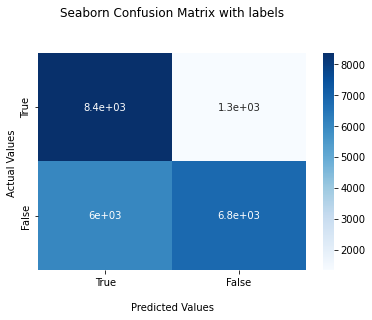

Precision =  0.836606923643506
Recall =  0.5310527546170031


In [146]:
ax = sns.heatmap(cm_maha_test_ss, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()


## FP,FN,TP,TN
TN_maha_test = cm_maha_test_ss[0][0]
FN_maha_test = cm_maha_test_ss[1][0]
FP_maha_test = cm_maha_test_ss[0][1]
TP_maha_test = cm_maha_test_ss[1][1]

##Precision and Recall
Precision_maha_test_ss = TP_maha_test/(TP_maha_test+FP_maha_test)
Recall_maha_test_ss = TP_maha_test/(TP_maha_test+FN_maha_test)

print ("Precision = ",Precision_maha_test_ss)
print ("Recall = ",Recall_maha_test_ss)

# Mahalanobis Testing (PCA)

In [147]:
mu_vec = np.mean(data_array_test,axis = 0)
inv_cormat = sp.linalg.pinv(np.cov(data_array_test, rowvar=False))

# For loop to get the distance for all the variables
mahal_dist = []

for i in range(data_array_test_ss.shape[0]):
    x_minus_mu = data_array_test[i,:] - mu_vec
    left_term = np.dot(x_minus_mu, inv_cormat)
    mahal = np.dot(left_term, x_minus_mu.T)
    mahal = np.sqrt(mahal)
    mahal_dist.append(mahal)

np.mean(test_one_hot_data_maha)

from scipy.stats import chi2
test_one_hot_data_maha['p-value'] = 1 - chi2.cdf(mahal_dist, df = 1) #pdf(x, degreeOfFreedom = Number of Variables)

#Calculate number of p-value less than 0.01
print(np.count_nonzero(test_one_hot_data_maha['p-value'] < 0.01))

C:\WINDOWS\system32\myenv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Variable 0    -3.495548e-17
Variable 1     2.145640e-16
Variable 2    -1.704098e-17
Variable 3     6.090862e-17
Variable 4     2.005920e-16
Variable 5     2.276883e-16
Variable 6    -1.910043e-17
Variable 7     1.624681e-16
Variable 8     1.091214e-16
Variable 9     1.582550e-17
Variable 10    9.782412e-17
Variable 11    1.377535e-16
Variable 12    1.409848e-16
Variable 13   -1.448648e-16
Variable 14    1.661370e-16
Variable 15    1.705914e-17
Variable 16    3.282432e-17
Variable 17    1.095055e-16
Variable 18   -3.208192e-17
Variable 19   -2.025280e-16
Variable 20    3.378980e-16
Variable 21    7.946508e-16
Variable 22    4.375295e-16
Variable 23    2.089449e-16
Variable 24   -7.023463e-16
dtype: float64

1159


In [148]:
pvalue_test = test_one_hot_data_maha['p-value']
bi_pvalue_test = pvalue_test

bi_pvalue_test = np.where(pvalue_test < 0.01, 1, bi_pvalue_test)
bi_pvalue_test = np.where(pvalue_test >= 0.01, 0, bi_pvalue_test)

from sklearn.metrics import accuracy_score

test_acc_maha = accuracy_score(kdd_test_y['class_binary'], bi_pvalue_test)
print("Training accuracy: {:.4f}".format(test_acc_maha))
cm_maha_test = confusion_matrix (kdd_test_y["class_binary"], bi_pvalue_test)
print(cm_maha_test)

Training accuracy: 0.4628
[[ 9493   218]
 [11892   941]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'True'), Text(1.5, 0, 'False')]

[Text(0, 0.5, 'True'), Text(0, 1.5, 'False')]

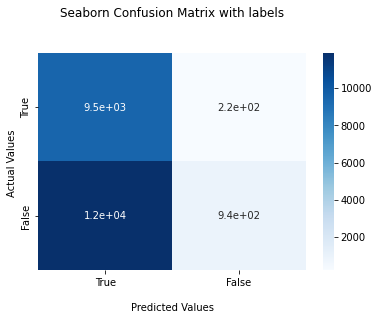

Precision =  0.8119068162208801
Recall =  0.07332657991116652


In [149]:
ax = sns.heatmap(cm_maha_test, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()


## FP,FN,TP,TN
TN_maha_test = cm_maha_test[0][0]
FN_maha_test = cm_maha_test[1][0]
FP_maha_test = cm_maha_test[0][1]
TP_maha_test = cm_maha_test[1][1]

##Precision and Recall
Precision_maha_test = TP_maha_test/(TP_maha_test+FP_maha_test)
Recall_maha_test = TP_maha_test/(TP_maha_test+FN_maha_test)

print ("Precision = ",Precision_maha_test)
print ("Recall = ",Recall_maha_test)

# Isolation Forest Testing (Without PCA)

In [150]:
model_if_ss = joblib.load('model_if_ss.sav')

In [151]:
test_one_hot_data_if_ss = test_one_hot_data_ss.drop(['p-value'],axis=1)

In [152]:
test_one_hot_data_if_ss

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,1,0
1,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,1,0
2,-0.154113,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,1,0
3,-0.155534,-0.021946,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,1,0,0
4,-0.154823,-0.021988,-0.096189,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.155534,-0.020309,-0.081202,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,...,0,0,0,0,0,0,0,0,1,0
22540,-0.155534,-0.021318,-0.052690,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,...,0,0,0,0,0,0,0,0,1,0
22541,-0.155534,0.093373,0.294926,-0.017624,-0.059104,-0.019459,2.040705,-0.143999,1.123125,0.121069,...,0,0,0,0,0,0,0,0,1,0
22542,-0.155534,-0.021899,-0.094917,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,0,1


In [153]:
y_pred_if_test_ss = model_if_ss.predict(test_one_hot_data_if_ss)

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


In [155]:
#Evaluation on training result
y_pred_if_test_ss = np.where(y_pred_if_test_ss == -1, 0, y_pred_if_test_ss)

from sklearn.metrics import accuracy_score
test_acc_if_ss = accuracy_score(kdd_test_y['class_binary'], y_pred_if_test_ss)
print("Training accuracy: {:.4f}".format(test_acc_if_ss))

Training accuracy: 0.5094


[[   51  9660]
 [ 1400 11433]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

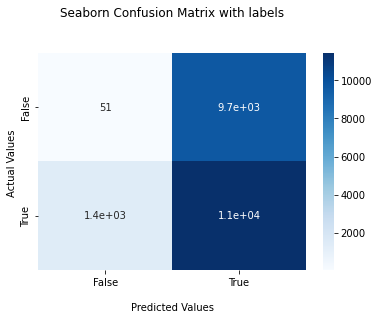

0.54202816100128
0.8909062573053845


In [156]:
cm_if_test_ss = confusion_matrix (kdd_test_y["class_binary"], y_pred_if_test_ss)
print(cm_if_test_ss)
ax = sns.heatmap(cm_if_test_ss, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## FP,FN,TP,TN
TN_if = cm_if_test_ss[0][0]
FN_if = cm_if_test_ss[1][0]
FP_if = cm_if_test_ss[0][1]
TP_if = cm_if_test_ss[1][1]

##Precision and Recall
Precision_if_test_ss = TP_if/(TP_if+FP_if)
Recall_if_test_ss = TP_if/(TP_if+FN_if)

print (Precision_if_test_ss)
print (Recall_if_test_ss)

# Isolation Forest Test With PCA

In [157]:
model_if = joblib.load('model_if_pca.sav')

In [158]:
test_one_hot_data_if = test_one_hot_data_pca.drop(['p-value'],axis=1)

In [159]:
test_one_hot_data_if

,Variable 0,Variable 1,Variable 2,Variable 3,Variable 4,Variable 5,Variable 6,Variable 7,Variable 8,Variable 9,...,Variable 15,Variable 16,Variable 17,Variable 18,Variable 19,Variable 20,Variable 21,Variable 22,Variable 23,Variable 24
0,1.678471,-0.872735,0.004462,0.120733,-0.347212,0.492001,0.395315,0.513245,-0.766787,-0.062395,...,0.087558,-0.038882,0.089035,0.014811,-0.188973,-0.241555,0.056354,0.496589,0.262695,0.138242
1,1.650825,-0.871036,0.022690,0.353080,-0.343112,0.335960,0.348479,0.469323,-0.854539,-0.026490,...,0.114284,-0.010822,0.145409,-0.009777,-0.598960,-0.375662,0.079052,0.296582,-0.031904,0.186943
2,-0.427776,-0.027269,-0.060373,-0.582327,0.404469,-0.682267,-0.200590,-0.123557,-0.589348,0.143091,...,0.237425,0.104148,0.405107,-0.178814,-1.405564,-1.652855,0.167176,-0.244964,-0.560684,0.149356
3,-0.761174,-0.208430,-0.118920,-1.318459,0.976187,-3.314352,0.566546,1.467814,-0.909149,-0.158967,...,-0.645055,0.286524,-1.667161,0.537770,-0.640816,0.353795,-0.069570,-0.619728,0.387254,0.831782
4,0.598909,-0.747321,0.025752,0.710066,-0.131553,-1.442168,0.498369,0.965454,-0.426952,-0.115368,...,-0.743813,0.298528,-1.560839,0.244327,0.749052,-1.549575,-0.039310,-1.909939,1.245003,-1.707101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.677682,-0.135917,-0.011245,0.455168,-0.042928,-0.256884,-0.100000,-0.189836,0.184557,-0.148044,...,0.292901,0.011651,0.372114,-0.168503,0.037988,-0.879554,0.102334,0.689764,0.934584,0.089823
22540,-0.872991,-0.194655,-0.066623,0.452831,-0.413141,0.185445,0.112065,0.035403,0.523127,-0.197381,...,0.052440,0.030961,0.042609,-0.075226,0.008420,0.335086,-0.003822,-0.023359,0.180496,0.502120
22541,-0.814737,-0.235138,0.074933,0.712311,0.369909,0.794684,-0.066708,0.487746,0.673540,0.041892,...,-0.258331,-0.006818,-0.122759,-0.063016,-0.370479,0.833970,-0.274282,-0.387895,-0.042715,0.810094
22542,-0.618400,-0.099512,-0.112588,-0.139796,-0.299245,0.215217,-0.019460,-0.011096,0.042121,-0.007055,...,-0.290904,0.188059,-0.449199,0.018738,-1.882938,0.507536,0.082598,-0.368224,0.264680,-2.207089


In [ ]:
#one_hot_data_if = one_hot_data_if.drop(['p-value','p-value_mcd'],axis=1)

In [162]:
one_hot_data_if

,Variable 0,Variable 1,Variable 2,Variable 3,Variable 4,Variable 5,Variable 6,Variable 7,Variable 8,Variable 9,...,Variable 15,Variable 16,Variable 17,Variable 18,Variable 19,Variable 20,Variable 21,Variable 22,Variable 23,Variable 24
0,-0.271817,-0.031828,-0.007913,-0.057511,-0.242415,0.177059,-0.356125,0.408246,0.040125,0.127202,...,0.017675,-0.207697,-0.037673,-0.320513,0.282792,2.121919,-0.554442,-0.128795,-1.473003,-1.178695
1,0.172646,0.493701,0.004511,-0.797854,-0.794043,1.396155,-1.419618,1.811961,-0.912519,0.028642,...,0.001159,-0.341808,-0.086006,-0.390951,0.353703,2.470519,-0.970944,0.370660,1.229125,0.620290
2,1.415630,-0.666276,0.012028,-0.028398,-0.176458,-0.336946,0.050874,-0.047367,0.161117,0.009214,...,-0.013284,-0.080540,0.029774,0.017559,-0.007434,0.089606,0.323906,-0.208934,0.327626,-0.075651
3,-0.904705,-0.465462,-0.041510,0.310599,0.131188,-0.845985,0.027311,0.064317,0.051110,0.009947,...,0.013662,-0.103791,0.018487,-1.077262,0.095570,-1.068195,-0.187457,-0.311417,0.040910,-0.580711
4,-0.829569,-0.395406,-0.070325,0.588581,0.832244,-0.290600,-0.145860,0.193486,0.064853,-0.023983,...,-0.028782,-0.083732,0.048325,0.359112,-0.102098,-0.014895,0.542320,0.586909,0.417905,1.189597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,1.432927,-0.660116,0.000861,-0.084749,-0.018009,-0.098309,0.132684,-0.176189,0.182252,-0.003731,...,-0.018946,-0.062724,0.028226,-0.014552,-0.014394,-0.228305,0.052992,0.020973,0.233702,-0.010744
125969,-0.579312,-0.249285,-0.087692,0.143871,0.675707,0.262858,-0.190329,0.254527,0.112493,0.077054,...,-0.009618,-0.129347,0.007511,0.295710,0.013124,1.560205,1.871801,-0.068697,1.161909,-1.218126
125970,-0.158302,-0.281355,0.027748,0.556132,0.016131,-0.276331,-0.602392,0.657011,0.010436,0.078126,...,-0.026978,-0.180230,0.006480,0.230496,0.154851,1.554297,-0.749160,1.389888,-1.716392,0.591811
125971,1.437126,-0.668559,0.014501,-0.037322,-0.168116,-0.276399,0.092500,-0.121089,0.193096,0.007072,...,-0.019991,-0.087068,0.026620,0.024639,0.010870,0.134870,0.074783,-0.037025,0.033698,0.038042


In [163]:
#model_if.fit(one_hot_data_if)

In [164]:
y_pred_if_test = model_if.predict(test_one_hot_data_if)

In [166]:
#Evaluation on training result
y_pred_if_test = np.where(y_pred_if_test == -1, 0, y_pred_if_test)

from sklearn.metrics import accuracy_score
test_acc_if = accuracy_score(kdd_test_y['class_binary'], y_pred_if_test)
print("Training accuracy: {:.4f}".format(test_acc_if))

Training accuracy: 0.5299


[[  201  9510]
 [ 1087 11746]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

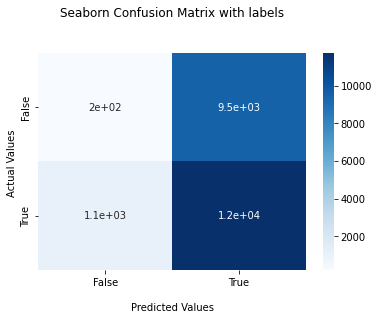

0.5525969138125706
0.9152965012078236


In [167]:
cm_if_test = confusion_matrix (kdd_test_y["class_binary"], y_pred_if_test)
print(cm_if_test)
ax = sns.heatmap(cm_if_test, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## FP,FN,TP,TN
TN_if = cm_if_test[0][0]
FN_if = cm_if_test[1][0]
FP_if = cm_if_test[0][1]
TP_if = cm_if_test[1][1]

##Precision and Recall
Precision_if_test = TP_if/(TP_if+FP_if)
Recall_if_test = TP_if/(TP_if+FN_if)

print (Precision_if_test)
print (Recall_if_test)

# OCSVM without PCA

In [168]:
test_one_hot_data_svm_ss = test_one_hot_data_ss.drop(['p-value'],axis=1)
test_one_hot_data_svm = test_one_hot_data_pca.drop(['p-value'],axis=1)

In [169]:
test_one_hot_data_svm_ss

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,1,0
1,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,1,0
2,-0.154113,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,1,0
3,-0.155534,-0.021946,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,1,0,0
4,-0.154823,-0.021988,-0.096189,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.155534,-0.020309,-0.081202,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,...,0,0,0,0,0,0,0,0,1,0
22540,-0.155534,-0.021318,-0.052690,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,...,0,0,0,0,0,0,0,0,1,0
22541,-0.155534,0.093373,0.294926,-0.017624,-0.059104,-0.019459,2.040705,-0.143999,1.123125,0.121069,...,0,0,0,0,0,0,0,0,1,0
22542,-0.155534,-0.021899,-0.094917,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,0,1


In [170]:
model_svm_ss_test = joblib.load('model_svm_ss.sav')
y_pred_svm_test_ss = model_svm_ss_test.predict(test_one_hot_data_svm_ss)

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but OneClassSVM was fitted without feature names
  warnings.warn(


In [173]:
y_pred_svm_test_ss = np.where(y_pred_svm_test_ss == -1, 0, y_pred_svm_test_ss)
test_acc_svm_ss = accuracy_score(kdd_test_y['class_binary'], y_pred_svm_test_ss)
print("Training accuracy: {:.4f}".format(test_acc_svm_ss))
cm_svm_test_ss = confusion_matrix (kdd_test_y["class_binary"], y_pred_svm_test_ss)
print(cm_svm_test_ss)

Training accuracy: 0.3679
[[1760 7951]
 [6299 6534]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

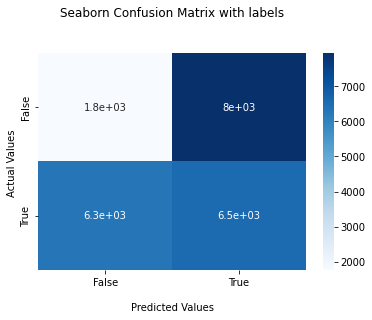

Precision:  0.4510873317224715
Recall 0.5091560819761553


In [174]:
ax = sns.heatmap(cm_svm_test_ss, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


## FP,FN,TP,TN
TN_svm = cm_svm_test_ss[0][0]
FN_svm = cm_svm_test_ss[1][0]
FP_svm = cm_svm_test_ss[0][1]
TP_svm = cm_svm_test_ss[1][1]


##Precision and Recall
Precision_svm_test_ss = TP_svm/(TP_svm+FP_svm)
Recall_svm_test_ss = TP_svm/(TP_svm+FN_svm)

print ("Precision: ",Precision_svm_test_ss)
print ("Recall",Recall_svm_test_ss)

# OCSVM Testing with PCA

In [176]:
model_svm = joblib.load('model_svm_pca.sav')
y_pred_svm_test = model_svm.predict(test_one_hot_data_svm)

y_pred_svm_test = np.where(y_pred_svm_test == -1, 0, y_pred_svm_test)
test_acc_svm = accuracy_score(kdd_test_y['class_binary'], y_pred_svm_test)
print("Training accuracy: {:.4f}".format(test_acc_svm))
cm_svm_test = confusion_matrix (kdd_test_y["class_binary"], y_pred_svm_test)
print(cm_svm_test)

Training accuracy: 0.5977
[[5651 4060]
 [5010 7823]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

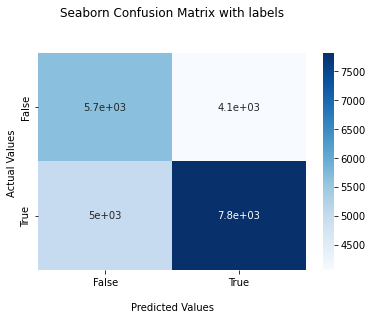

Precision:  0.6583354371791635
Recall 0.6096002493571262


In [177]:
ax = sns.heatmap(cm_svm_test, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


## FP,FN,TP,TN
TN_svm = cm_svm_test[0][0]
FN_svm = cm_svm_test[1][0]
FP_svm = cm_svm_test[0][1]
TP_svm = cm_svm_test[1][1]


##Precision and Recall
Precision_svm_test = TP_svm/(TP_svm+FP_svm)
Recall_svm_test = TP_svm/(TP_svm+FN_svm)

print ("Precision: ",Precision_svm_test)
print ("Recall",Recall_svm_test)

# Kmean Cluster Testing (Without PCA)

In [178]:
test_one_hot_data_kmean_ss = test_one_hot_data_ss.drop(['p-value'],axis=1)

In [179]:
kmean_ss = KMeans(n_clusters=2)
kmean_ss.fit(test_one_hot_data_kmean_ss)

KMeans(n_clusters=2)

In [180]:
kmean_test_result_ss = kmean_ss.labels_

In [181]:
kmean_test_result_ss_c = kmean_test_result_ss

In [182]:
count_1 = np.count_nonzero(kmean_test_result_ss==1)
count_0 = kmean_test_result_ss.shape[0] - np.count_nonzero(kmean_test_result_ss==1)

In [183]:
kmean_test_result_ss

array([1, 1, 0, ..., 0, 0, 1])

In [184]:
#if 1 > 0, then change 1 to 0 and 0 to 1
if(count_1 > count_0):
    kmean_test_result_ss = np.where(kmean_test_result_ss_c ==1, 0, kmean_test_result_ss)
    kmean_test_result_ss = np.where(kmean_test_result_ss_c ==0, 1, kmean_test_result_ss)

In [187]:
test_acc_kmean_ss = accuracy_score(kdd_test_y['class_binary'], kmean_test_result_ss)
print("Training accuracy: {:.4f}".format(test_acc_kmean_ss))
cm_kmean_test_ss = confusion_matrix (kdd_test_y["class_binary"], kmean_test_result_ss)
print(cm_kmean_test_ss)

Training accuracy: 0.7499
[[9499  212]
 [5426 7407]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

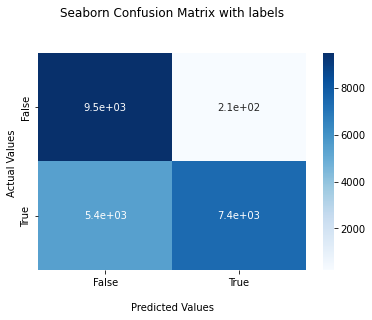

Precision:  0.972174826092663
Recall 0.5771838229564404


In [188]:
    ax = sns.heatmap(cm_kmean_test_ss, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()


    ## FP,FN,TP,TN
    TN_kmean = cm_kmean_test_ss[0][0]
    FN_kmean = cm_kmean_test_ss[1][0]
    FP_kmean = cm_kmean_test_ss[0][1]
    TP_kmean = cm_kmean_test_ss[1][1]


    ##Precision and Recall
    Precision_kmean_test_ss = TP_kmean/(TP_kmean+FP_kmean)
    Recall_kmean_test_ss = TP_kmean/(TP_kmean+FN_kmean)

    print ("Precision: ",Precision_kmean_test_ss)
    print ("Recall",Recall_kmean_test_ss)

# Kmean Clustering Testing (With PCA)

In [189]:
kmean_pca = KMeans(n_clusters = 2)

In [190]:
test_one_hot_data_kmean = test_one_hot_data.drop(['p-value'],axis=1)

In [191]:
kmean_pca.fit(test_one_hot_data_kmean)
kmean_test_result = kmean_pca.labels_
kmean_test_result_c = kmean_test_result

KMeans(n_clusters=2)

In [192]:
count_1 = np.count_nonzero(kmean_test_result==1)
count_0 = kmean_test_result.shape[0] - np.count_nonzero(kmean_test_result==1)

In [193]:
kmean_test_result

array([1, 1, 0, ..., 0, 0, 1])

In [194]:
if(count_1 > count_0):
    kmean_test_result = np.where(kmean_test_result_c ==1, 0, kmean_test_result)
    kmean_test_result = np.where(kmean_test_result_c ==0, 1, kmean_test_result)

In [195]:
kmean_test_result

array([1, 1, 0, ..., 0, 0, 1])

In [198]:
test_acc_kmean = accuracy_score(kdd_test_y['class_binary'], kmean_test_result)
print("Training accuracy: {:.4f}".format(test_acc_kmean))
cm_kmean_test = confusion_matrix (kdd_test_y["class_binary"], kmean_test_result)
print(cm_kmean_test)

Training accuracy: 0.6528
[[9565  146]
 [7681 5152]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

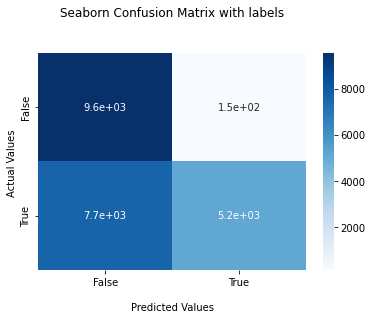

Precision:  0.9724424311060778
Recall 0.40146497311618484


In [199]:
    ax = sns.heatmap(cm_kmean_test, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()


    ## FP,FN,TP,TN
    TN_kmean = cm_kmean_test[0][0]
    FN_kmean = cm_kmean_test[1][0]
    FP_kmean = cm_kmean_test[0][1]
    TP_kmean = cm_kmean_test[1][1]


    ##Precision and Recall
    Precision_kmean_test = TP_kmean/(TP_kmean+FP_kmean)
    Recall_kmean_test = TP_kmean/(TP_kmean+FN_kmean)

    print ("Precision: ",Precision_kmean_test)
    print ("Recall",Recall_kmean_test)

# MCD Testing Without PCA

In [200]:
test_one_hot_data_mcd_ss = test_one_hot_data_ss.drop(['p-value'],axis=1)
model_mcd_ss = joblib.load('model_mcd_ss.sav')

In [201]:
model_mcd_ss = MinCovDet(random_state=42).fit(test_one_hot_data_mcd_ss)

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\covariance\_robust_covariance.py:738: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


In [202]:
np.mean(data_array_test_ss,axis = 0)
sp.linalg.pinv(np.cov(data_array_test_ss, rowvar=False))
inv_cormat = sp.linalg.pinv(model_mcd_ss.covariance_)
mu_vect = model_mcd_ss.location_

array([ 2.71055160e-17,  3.78216502e-18,  1.89108251e-18,  2.52144335e-18,
        6.30360837e-19,  3.15180419e-19,  1.48134797e-17,  5.98842795e-18,
        1.38679384e-17,  3.78216502e-18,  1.68621524e-17, -3.78216502e-18,
        2.52144335e-18, -6.30360837e-19, -3.78216502e-18, -3.78216502e-18,
        1.89108251e-18,  3.07300908e-17, -3.53002069e-17,  1.70197426e-17,
        5.54717537e-17,  2.26929901e-17, -1.76501034e-17,  2.20626293e-17,
       -3.43546656e-16, -1.63893818e-17,  6.96548725e-17, -1.67045622e-17,
        7.76919732e-17, -1.31430235e-16, -8.19469088e-18,  3.27787635e-17,
        1.92260055e-17, -2.52144335e-17, -4.83801943e-17,  1.76501034e-17,
       -1.57590209e-17,  1.77430802e-04,  1.70777147e-01,  3.42885025e-02,
        8.87154010e-05,  2.96753016e-02,  8.92920511e-02,  9.31511710e-04,
        6.65365507e-04,  1.10450674e-02,  6.59820795e-01,  3.23811214e-03,
        5.76650106e-04,  6.65365507e-04,  1.99609652e-03,  0.00000000e+00,
        2.97196593e-03,  

array([[ 1.80137153e+00,  7.88031525e-02, -8.65253143e-02, ...,
         5.41261256e-01, -1.11622464e+00,  5.74963386e-01],
       [ 7.88031525e-02,  1.15244861e+00,  1.19750037e-02, ...,
         2.11561824e-01, -2.02934412e-01, -8.62741200e-03],
       [-8.65253143e-02,  1.19750037e-02,  1.10007136e+00, ...,
         7.43466023e-02,  1.18577283e-01, -1.92923885e-01],
       ...,
       [ 5.41261256e-01,  2.11561824e-01,  7.43466023e-02, ...,
         1.12134323e+02, -6.12428185e+01, -5.08915049e+01],
       [-1.11622464e+00, -2.02934412e-01,  1.18577283e-01, ...,
        -6.12428185e+01,  5.81092728e+01,  3.13354566e+00],
       [ 5.74963386e-01, -8.62741200e-03, -1.92923885e-01, ...,
        -5.08915049e+01,  3.13354566e+00,  4.77579593e+01]])

In [203]:
mahal_dist_test_ss = []
for i in range(data_array_test_ss.shape[0]):
    x_minus_mu = data_array_test_ss[i,:] - mu_vect
    left_term = np.dot(x_minus_mu, inv_cormat)
    mahal = np.dot(left_term, x_minus_mu.T)
    mahal = np.sqrt(mahal)
    mahal_dist_test_ss.append(mahal)

In [204]:
np.mean(test_one_hot_data_mcd_ss)

from scipy.stats import chi2
test_one_hot_data_mcd_ss['p-value_mcd'] = 1 - chi2.cdf(mahal_dist_test_ss, df = 120) #pdf(x, degreeOfFreedom = Number of Variables)

#Calculate number of p-value less than 0.01
print(np.count_nonzero(test_one_hot_data_mcd_ss['p-value_mcd'] < 0.01))

C:\WINDOWS\system32\myenv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


duration              2.710552e-17
src_bytes             3.782165e-18
dst_bytes             1.891083e-18
land                  2.521443e-18
wrong_fragment        6.303608e-19
                          ...     
service_vmnet         1.907381e-03
service_whois         1.774308e-03
protocol_type_icmp    4.626508e-02
protocol_type_tcp     8.374734e-01
protocol_type_udp     1.162615e-01
Length: 121, dtype: float64

7892


In [205]:
pvalue_mcd = test_one_hot_data_mcd_ss['p-value_mcd']
bi_pvalue_mcd = pvalue_mcd

bi_pvalue_mcd = np.where(pvalue_mcd < 0.01, 1, bi_pvalue_mcd)
bi_pvalue_mcd = np.where(pvalue_mcd >= 0.01, 0, bi_pvalue_mcd)

In [206]:
from sklearn.metrics import accuracy_score

test_acc_maha_mcd_ss = accuracy_score(kdd_test_y['class_binary'], bi_pvalue_mcd)
print("Training accuracy: {:.4f}".format(test_acc_maha_mcd_ss))
cm_maha_mcd_test_ss = confusion_matrix (kdd_test_y["class_binary"], bi_pvalue_mcd)
print(cm_maha_mcd_test_ss)

Training accuracy: 0.6466
[[8198 1513]
 [6454 6379]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

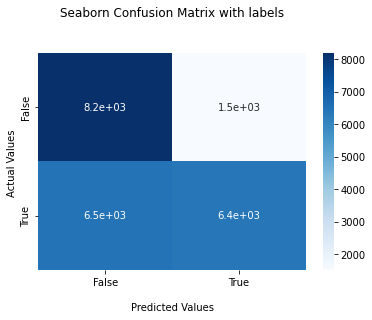

0.8082868727825646
0.4970778461778228


In [207]:
ax = sns.heatmap(cm_maha_mcd_test_ss, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## FP,FN,TP,TN
TN_maha_mcd = cm_maha_mcd_test_ss[0][0]
FN_maha_mcd = cm_maha_mcd_test_ss[1][0]
FP_maha_mcd = cm_maha_mcd_test_ss[0][1]
TP_maha_mcd = cm_maha_mcd_test_ss[1][1]

##Precision and Recall
Precision_maha_mcd_test_ss = TP_maha_mcd/(TP_maha_mcd+FP_maha_mcd)
Recall_maha_mcd_test_ss = TP_maha_mcd/(TP_maha_mcd+FN_maha_mcd)

print (Precision_maha_mcd_test_ss)
print (Recall_maha_mcd_test_ss)

## MCD after PCA 

In [208]:
test_one_hot_data_pca

,Variable 0,Variable 1,Variable 2,Variable 3,Variable 4,Variable 5,Variable 6,Variable 7,Variable 8,Variable 9,...,Variable 16,Variable 17,Variable 18,Variable 19,Variable 20,Variable 21,Variable 22,Variable 23,Variable 24,p-value
0,1.678471,-0.872735,0.004462,0.120733,-0.347212,0.492001,0.395315,0.513245,-0.766787,-0.062395,...,-0.038882,0.089035,0.014811,-0.188973,-0.241555,0.056354,0.496589,0.262695,0.138242,0.121940
1,1.650825,-0.871036,0.022690,0.353080,-0.343112,0.335960,0.348479,0.469323,-0.854539,-0.026490,...,-0.010822,0.145409,-0.009777,-0.598960,-0.375662,0.079052,0.296582,-0.031904,0.186943,0.120079
2,-0.427776,-0.027269,-0.060373,-0.582327,0.404469,-0.682267,-0.200590,-0.123557,-0.589348,0.143091,...,0.104148,0.405107,-0.178814,-1.405564,-1.652855,0.167176,-0.244964,-0.560684,0.149356,0.101562
3,-0.761174,-0.208430,-0.118920,-1.318459,0.976187,-3.314352,0.566546,1.467814,-0.909149,-0.158967,...,0.286524,-1.667161,0.537770,-0.640816,0.353795,-0.069570,-0.619728,0.387254,0.831782,0.024576
4,0.598909,-0.747321,0.025752,0.710066,-0.131553,-1.442168,0.498369,0.965454,-0.426952,-0.115368,...,0.298528,-1.560839,0.244327,0.749052,-1.549575,-0.039310,-1.909939,1.245003,-1.707101,0.033682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.677682,-0.135917,-0.011245,0.455168,-0.042928,-0.256884,-0.100000,-0.189836,0.184557,-0.148044,...,0.011651,0.372114,-0.168503,0.037988,-0.879554,0.102334,0.689764,0.934584,0.089823,0.171570
22540,-0.872991,-0.194655,-0.066623,0.452831,-0.413141,0.185445,0.112065,0.035403,0.523127,-0.197381,...,0.030961,0.042609,-0.075226,0.008420,0.335086,-0.003822,-0.023359,0.180496,0.502120,0.234599
22541,-0.814737,-0.235138,0.074933,0.712311,0.369909,0.794684,-0.066708,0.487746,0.673540,0.041892,...,-0.006818,-0.122759,-0.063016,-0.370479,0.833970,-0.274282,-0.387895,-0.042715,0.810094,0.141856
22542,-0.618400,-0.099512,-0.112588,-0.139796,-0.299245,0.215217,-0.019460,-0.011096,0.042121,-0.007055,...,0.188059,-0.449199,0.018738,-1.882938,0.507536,0.082598,-0.368224,0.264680,-2.207089,0.066998


In [209]:
test_one_hot_data_mcd = test_one_hot_data_pca.drop(['p-value'],axis=1)


In [210]:
test_one_hot_data_mcd

,Variable 0,Variable 1,Variable 2,Variable 3,Variable 4,Variable 5,Variable 6,Variable 7,Variable 8,Variable 9,...,Variable 15,Variable 16,Variable 17,Variable 18,Variable 19,Variable 20,Variable 21,Variable 22,Variable 23,Variable 24
0,1.678471,-0.872735,0.004462,0.120733,-0.347212,0.492001,0.395315,0.513245,-0.766787,-0.062395,...,0.087558,-0.038882,0.089035,0.014811,-0.188973,-0.241555,0.056354,0.496589,0.262695,0.138242
1,1.650825,-0.871036,0.022690,0.353080,-0.343112,0.335960,0.348479,0.469323,-0.854539,-0.026490,...,0.114284,-0.010822,0.145409,-0.009777,-0.598960,-0.375662,0.079052,0.296582,-0.031904,0.186943
2,-0.427776,-0.027269,-0.060373,-0.582327,0.404469,-0.682267,-0.200590,-0.123557,-0.589348,0.143091,...,0.237425,0.104148,0.405107,-0.178814,-1.405564,-1.652855,0.167176,-0.244964,-0.560684,0.149356
3,-0.761174,-0.208430,-0.118920,-1.318459,0.976187,-3.314352,0.566546,1.467814,-0.909149,-0.158967,...,-0.645055,0.286524,-1.667161,0.537770,-0.640816,0.353795,-0.069570,-0.619728,0.387254,0.831782
4,0.598909,-0.747321,0.025752,0.710066,-0.131553,-1.442168,0.498369,0.965454,-0.426952,-0.115368,...,-0.743813,0.298528,-1.560839,0.244327,0.749052,-1.549575,-0.039310,-1.909939,1.245003,-1.707101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.677682,-0.135917,-0.011245,0.455168,-0.042928,-0.256884,-0.100000,-0.189836,0.184557,-0.148044,...,0.292901,0.011651,0.372114,-0.168503,0.037988,-0.879554,0.102334,0.689764,0.934584,0.089823
22540,-0.872991,-0.194655,-0.066623,0.452831,-0.413141,0.185445,0.112065,0.035403,0.523127,-0.197381,...,0.052440,0.030961,0.042609,-0.075226,0.008420,0.335086,-0.003822,-0.023359,0.180496,0.502120
22541,-0.814737,-0.235138,0.074933,0.712311,0.369909,0.794684,-0.066708,0.487746,0.673540,0.041892,...,-0.258331,-0.006818,-0.122759,-0.063016,-0.370479,0.833970,-0.274282,-0.387895,-0.042715,0.810094
22542,-0.618400,-0.099512,-0.112588,-0.139796,-0.299245,0.215217,-0.019460,-0.011096,0.042121,-0.007055,...,-0.290904,0.188059,-0.449199,0.018738,-1.882938,0.507536,0.082598,-0.368224,0.264680,-2.207089


In [211]:
model_mcd = MinCovDet(random_state=42)

In [212]:
model_mcd.fit(test_one_hot_data_mcd)

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-291.400184551643349 > -291.493339287947265). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-255.334111964443139 > -256.772087331907812). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-259.126179380954341 > -261.084996263235723). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-256.318059645169058 > -257.735156658624874). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-293.900401904098260 > -294.931420317649042). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-299.722577706088543 > -300.398431063832959). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-297.173682211442156 > -297.531262926229658). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-272.952938761659652 > -273.004436228050565). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-267.365405443211671 > -268.391272066403701). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-308.467250491138543 > -308.474147019633904). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-299.130414542917947 > -300.067819318488262). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-297.556257180990656 > -298.422724504678456). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn

MinCovDet(random_state=42)

In [213]:
np.mean(data_array_test,axis = 0)
sp.linalg.pinv(np.cov(data_array_test, rowvar=False))
inv_cormat = sp.linalg.pinv(model_mcd.covariance_)
mu_vect = model_mcd.location_

array([-3.49554783e-17,  2.14563995e-16, -1.70409803e-17,  6.09086159e-17,
        2.00592022e-16,  2.27688304e-16, -1.91004258e-17,  1.62468119e-16,
        1.09121371e-16,  1.58255043e-17,  9.78241224e-17,  1.37753542e-16,
        1.40984757e-16, -1.44864800e-16,  1.66137016e-16,  1.70591402e-17,
        3.28243170e-17,  1.09505497e-16, -3.20819193e-17, -2.02528042e-16,
        3.37898032e-16,  7.94650785e-16,  4.37529517e-16,  2.08944919e-16,
       -7.02346321e-16])

array([[ 1.00000000e+00,  2.41616207e-16, -6.78061953e-17,
        -1.56415221e-17,  9.81042570e-18, -1.91086605e-17,
        -1.72174941e-17, -1.36715571e-17,  9.63312885e-18,
         1.64393579e-17, -3.69368437e-18,  7.09187400e-18,
        -1.79082131e-18,  7.63853929e-18,  1.20734230e-17,
         6.77667960e-18, -2.22015055e-17, -4.52845704e-18,
        -9.84982500e-19,  9.84982500e-19, -2.08816290e-18,
        -4.21080019e-18, -6.38268660e-18,  4.33392300e-19,
        -5.04311040e-18],
       [-2.41616207e-16,  1.00000000e+00,  1.44820170e-16,
         2.37435423e-16, -8.18988179e-17,  9.00036483e-16,
         4.86167114e-16,  1.66627998e-16,  1.45743372e-16,
         1.28071434e-16,  2.96035380e-16,  1.82708711e-16,
        -3.02080926e-16,  2.57131904e-16, -4.21606811e-16,
         1.33229952e-17,  4.80240973e-16,  1.79581938e-18,
         1.50376975e-16, -8.18742562e-17,  1.10677561e-16,
        -1.01145563e-16,  1.67299788e-16,  6.58603981e-17,
         8.67361738e-19],
    

In [214]:
mahal_dist_test = []
for i in range(data_array_test.shape[0]):
    x_minus_mu = data_array_test[i,:] - mu_vect
    left_term = np.dot(x_minus_mu, inv_cormat)
    mahal = np.dot(left_term, x_minus_mu.T)
    mahal = np.sqrt(mahal)
    mahal_dist_test.append(mahal)

In [215]:
np.mean(test_one_hot_data_mcd)

from scipy.stats import chi2
test_one_hot_data_mcd['p-value_mcd'] = 1 - chi2.cdf(mahal_dist_test, df = 24) #pdf(x, degreeOfFreedom = Number of Variables)

#Calculate number of p-value less than 0.01
print(np.count_nonzero(test_one_hot_data_mcd['p-value_mcd'] < 0.01))

C:\WINDOWS\system32\myenv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Variable 0    -4.128863e-17
Variable 1     2.064432e-16
Variable 2    -6.303608e-19
Variable 3     1.216596e-16
Variable 4     1.875323e-16
Variable 5     2.253540e-16
Variable 6    -2.080191e-17
Variable 7     1.560143e-16
Variable 8     1.260722e-16
Variable 9     2.521443e-18
Variable 10    9.660280e-17
Variable 11    1.326910e-16
Variable 12    1.607420e-16
Variable 13   -1.355276e-16
Variable 14    1.752403e-16
Variable 15    1.575902e-18
Variable 16    2.742070e-17
Variable 17    9.219027e-17
Variable 18   -2.915419e-17
Variable 19   -2.039217e-16
Variable 20    3.347216e-16
Variable 21    8.065467e-16
Variable 22    4.462955e-16
Variable 23    2.051825e-16
Variable 24   -7.198721e-16
dtype: float64

11079


In [216]:
pvalue_mcd = test_one_hot_data_mcd['p-value_mcd']
bi_pvalue_mcd = pvalue_mcd

bi_pvalue_mcd = np.where(pvalue_mcd < 0.01, 1, bi_pvalue_mcd)
bi_pvalue_mcd = np.where(pvalue_mcd >= 0.01, 0, bi_pvalue_mcd)

In [217]:
from sklearn.metrics import accuracy_score

test_acc_maha_mcd = accuracy_score(kdd_test_y['class_binary'], bi_pvalue_mcd)
print("Training accuracy: {:.4f}".format(test_acc_maha_mcd))
cm_maha_mcd_test = confusion_matrix (kdd_test_y["class_binary"], bi_pvalue_mcd)
print(cm_maha_mcd_test)

Training accuracy: 0.7244
[[7482 2229]
 [3983 8850]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

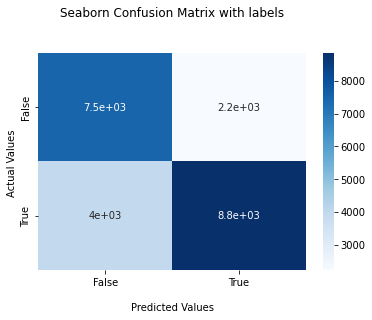

0.7988085567289467
0.6896283020338191


In [218]:
ax = sns.heatmap(cm_maha_mcd_test, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## FP,FN,TP,TN
TN_maha_mcd = cm_maha_mcd_test[0][0]
FN_maha_mcd = cm_maha_mcd_test[1][0]
FP_maha_mcd = cm_maha_mcd_test[0][1]
TP_maha_mcd = cm_maha_mcd_test[1][1]

##Precision and Recall
Precision_maha_mcd_test = TP_maha_mcd/(TP_maha_mcd+FP_maha_mcd)
Recall_maha_mcd_test = TP_maha_mcd/(TP_maha_mcd+FN_maha_mcd)

print (Precision_maha_mcd_test)
print (Recall_maha_mcd_test)

# Testing Result Comparison
## Without PCA

In [219]:
header_cmp = ['Algorithm','accuracy', 'recall', 'precision']
table_cmp = [['Mahalanobis', test_acc_maha_ss, Recall_maha_test_ss, Precision_maha_test_ss],
             ['Maha + MCD', test_acc_maha_mcd_ss, Recall_maha_mcd_test_ss, Precision_maha_mcd_test_ss],
             ['IF', test_acc_if_ss, Recall_if_test_ss, Precision_if_test_ss],
             ['OCSVM', test_acc_svm_ss, Recall_svm_test_ss, Precision_svm_test_ss],
             ['Kmean', test_acc_kmean_ss, Recall_kmean_test_ss, Precision_kmean_test_ss]]
comparison_ss_test = pd.DataFrame(table_cmp,columns=header_cmp)
comparison_ss_test

,Algorithm,accuracy,recall,precision
0,Mahalanobis,0.674015,0.531053,0.836607
1,Maha + MCD,0.646602,0.497078,0.808287
2,IF,0.509404,0.890906,0.542028
3,OCSVM,0.367903,0.509156,0.451087
4,Kmean,0.749911,0.577184,0.972175


## After PCA

In [220]:
header_cmp = ['Algorithm','accuracy', 'recall', 'precision']
table_cmp = [['Mahalanobis', test_acc_maha, Recall_maha_test, Precision_maha_test],
             ['Maha + MCD', test_acc_maha_mcd, Recall_maha_mcd_test, Precision_maha_mcd_test],
             ['IF', test_acc_if, Recall_if_test, Precision_if_test],
             ['OCSVM', test_acc_svm, Recall_svm_test, Precision_svm_test],
             ['Kmean', test_acc_kmean, Recall_kmean_test, Precision_kmean_test]]
comparison_test = pd.DataFrame(table_cmp,columns=header_cmp)
comparison_test

,Algorithm,accuracy,recall,precision
0,Mahalanobis,0.462828,0.073327,0.811907
1,Maha + MCD,0.724450,0.689628,0.798809
2,IF,0.529941,0.915297,0.552597
3,OCSVM,0.597676,0.609600,0.658335
4,Kmean,0.652812,0.401465,0.972442
